# Two-Tier Document Parser Visualization

This notebook demonstrates the capabilities of both parsing services:
- **Fast Parser**: Ultra-fast text extraction using PyMuPDF4LLM
- **Accurate Parser**: High-quality multimodal extraction using MinerU (with automatic GPU detection and CPU fallback)

## Setup
Make sure both services are running:
```bash
cd ../../deploy
docker-compose up --build -d
```

Or from the project root:
```bash
make up
```

In [1]:
# Import required libraries
import requests
import base64
import json
from pathlib import Path
from IPython.display import display, Markdown, Image, HTML
import pandas as pd
from io import BytesIO
import matplotlib.pyplot as plt
import time

# Service endpoints
FAST_PARSER_URL = "http://localhost:8004"
ACCURATE_PARSER_URL = "http://localhost:8005"

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


## 1. Health Check
Verify both services are running

In [2]:
def check_health(service_name, url):
    """Check health status of a parser service."""
    try:
        response = requests.get(f"{url}/health", timeout=5)
        if response.status_code == 200:
            data = response.json()
            print(f"\n✅ {service_name} is healthy")
            print(f"   Status: {data['status']}")
            print(f"   Workers: {data['workers']}")
            if 'no_gil' in data:
                print(f"   No-GIL Mode: {data['no_gil']}")
            if 'gpu_available' in data:
                print(f"   GPU Available: {data['gpu_available']}")
            print(f"   Parser: {data['parser']}")
            print(f"   Version: {data['version']}")
            return True
        else:
            print(f"\n❌ {service_name} returned status code {response.status_code}")
            return False
    except requests.exceptions.RequestException as e:
        print(f"\n❌ {service_name} is not reachable: {e}")
        return False

# Check both services
fast_healthy = check_health("Fast Parser", FAST_PARSER_URL)
accurate_healthy = check_health("Accurate Parser", ACCURATE_PARSER_URL)

if fast_healthy and accurate_healthy:
    print("\n🎉 Both services are ready!")
else:
    print("\n⚠️ Some services are not available. Make sure Docker Compose is running.")


✅ Fast Parser is healthy
   Status: healthy
   Workers: 4
   No-GIL Mode: True
   Parser: pymupdf4llm
   Version: 1.0.0

✅ Accurate Parser is healthy
   Status: healthy
   Workers: 2
   GPU Available: True
   Parser: mineru
   Version: 1.0.0

🎉 Both services are ready!


## 2. Upload PDF File
Specify the path to your local PDF file

In [3]:
# Specify your PDF file path here
PDF_FILE_PATH = "../data/sample.pdf"  # Default: sample PDF in examples/data/

# Validate file exists
pdf_path = Path(PDF_FILE_PATH)
if not pdf_path.exists():
    print(f"❌ File not found: {PDF_FILE_PATH}")
    print("Please update PDF_FILE_PATH with a valid PDF file path")
elif not pdf_path.suffix.lower() == '.pdf':
    print(f"❌ File is not a PDF: {PDF_FILE_PATH}")
else:
    print(f"✅ PDF file found: {pdf_path.name}")
    print(f"   Size: {pdf_path.stat().st_size / 1024:.2f} KB")

✅ PDF file found: sample.pdf
   Size: 1407.32 KB


## 3. Parse with Fast Parser (PyMuPDF4LLM)
Ultra-fast text extraction

In [4]:
def parse_with_fast_parser(file_path):
    """Parse PDF with fast parser service."""
    print(f"\n⏳ Parsing with Fast Parser...")
    start_time = time.time()
    
    with open(file_path, 'rb') as f:
        files = {'file': (file_path.name, f, 'application/pdf')}
        response = requests.post(f"{FAST_PARSER_URL}/parse", files=files, timeout=30)
    
    elapsed = time.time() - start_time
    
    if response.status_code == 200:
        result = response.json()
        print(f"✅ Fast Parser completed in {elapsed:.2f}s")
        return result
    else:
        print(f"❌ Fast Parser failed: {response.status_code}")
        print(response.text)
        return None

# Parse with fast parser
if pdf_path.exists():
    fast_result = parse_with_fast_parser(pdf_path)
else:
    fast_result = None
    print("⚠️ Skipping fast parser - file not found")


⏳ Parsing with Fast Parser...
✅ Fast Parser completed in 8.40s


### 3.1 Display Fast Parser Metadata

In [5]:
if fast_result:
    metadata = fast_result['metadata']
    
    print("\n📊 Fast Parser Metadata:")
    print(f"   Parser: {metadata['parser']}")
    print(f"   Version: {metadata['version']}")
    print(f"   Pages: {metadata['pages']}")
    print(f"   Processing Time: {metadata['processing_time_ms']} ms")
    print(f"   Filename: {metadata['filename']}")
    
    # Create metadata DataFrame
    df_fast_meta = pd.DataFrame([metadata]).T
    df_fast_meta.columns = ['Value']
    display(df_fast_meta)


📊 Fast Parser Metadata:
   Parser: pymupdf4llm
   Version: 0.2.0
   Pages: 11
   Processing Time: 8384 ms
   Filename: sample.pdf


Value
pages                        11
processing_time_ms         8384
parser              pymupdf4llm
version                   0.2.0
filename             sample.pdf

### 3.2 Display Fast Parser Markdown Output

In [6]:
if fast_result:
    print("\n📄 Fast Parser Markdown Output:")
    print("=" * 80)
    display(Markdown(fast_result['markdown']))
    print("=" * 80)
    print(f"\nMarkdown length: {len(fast_result['markdown'])} characters")


📄 Fast Parser Markdown Output:


Received August 26, 2019, accepted September 7, 2019, date of publication September 12, 2019, date of current version October 4, 2019.


_Digital Object Identifier 10.1109/ACCESS.2019.2940769_

# Motor Fault Detection and Feature Extraction Using RNN-Based Variational Autoencoder


YANG HUANG 1, CHIUN-HSUN CHEN 2, AND CHI-JUI HUANG2

1Institute of Information Management, National Chiao Tung University, Hsinchu 30010, Taiwan
2Department of Mechanical Engineering, National Chiao Tung University, Hsinchu 30010, Taiwan


Corresponding author: Chiun-Hsun Chen (chchen@mail.nctu.edu.tw)


This work was supported by the Ministry of Science and Technology of Taiwan under Grants MOST 107-2622-8-009-020 and MOST
108-2221-E-009-059-MY2.


**ABSTRACT** In most of the fault detection methods, the time domain signals collected from the mechanical
equipment usually need to be transformed into frequency domain or other high-level data, highly relying
on professional knowledge such as signal processing and fault pattern recognition. Contrary to those
existing approaches, we proposed a two-stage machine learning analysis architecture which can accurately
predict the motor fault modes only by using motor vibration time-domain signals without any complicated
preprocessing. In the first stage, the method RNN-based VAE was proposed which is highly suitable for
dimension reduction of time series data. In addition to reducing the dimension of sequential data from
150∗3 to 25 dimensions, our method furthermore improves the prediction accuracy evaluated by several
classification algorithms. While other dimension reduction methods such as Autoencoder and Variational
Autoencoder cannot improve the classification accuracy effectively or even decreased. It indicates that the
sequential data after dimension reduction via the RNN-based VAE still can maintain the high-dimensional
data information. Furthermore, the experimental results demonstrate that it can be well applied to time
series data dimension reduction and shows a significant improvement of the prediction performance, even
with a simple double-layer Neural Network can reach over 99% of accuracy. In the second stage, Principal
Components Analysis (PCA) and Linear Discriminant Analysis (LDA) are used to further perform the second
dimension reduction, such that the different or unknown fault modes can be clearly visualized and detected.


**INDEX TERMS** Motor fault detection, feature extraction, recurrent neural network, variational autoencoder.



**I. INTRODUCTION**

In recent years, the global manufacturing has faced with
the environmental tests such as rapidly changed market and
increasinglypersonalized demands. In addition, under the
general lack of labor force, it is difficult for manufacturers to
maintain their industrial status if they cannot flexibly adapt
to the production conditions. The ‘‘smart manufacturing’’
rising with the stack of the above factors is rapidly reshaping
the appearance of the global manufacturing and factories.
For example, in semiconductor process, due to continuous
pursuit of lightweight, efficiency and endurance of electronic
products, the competition on semiconductor wafer process
technology among all major factories is becoming increasingly fierce. In the well-developed area of materials and products, it is more likely to encounter bottlenecks and technical
challenges are getting tougher. If various machine parameters


The associate editor coordinating the review of this manuscript and
approving it for publication was Vincenzo Piuri.



of the process control can be successfully used for analysis,
there will be an opportunity to find breakthroughs.
In the traditional way of machine fault diagnosis, simple
measuring instruments are used to collect signals, so that
maintenance personnel can conduct diagnosis based on their
knowledge and experience. The principle of machine management is to conduct regular and routine maintenance, or to
shut down for maintenance after faults occur, or even direct
replacement. However, in such a way, the capacity losses
arising from shutdown shall be borne, and the fault factors
may have irreparably damaged machines. Hence, in smart
manufacturing, the use of fault detection and classification
system (FDC) is specially emphasized [4].
According to the McKinsey Report [26], big data analysis
has great commercial application potentials in the maintenance industry. Different from the previous mode of routine inspection and break-down repair, in FDC, big data
is used to analyze health conditions of machine, to predict possible faults of machine and to prevent further loss



139086 This work is licensed under a Creative Commons Attribution 4.0 License. For more information, see http://creativecommons.org/licenses/by/4.0/ VOLUME 7, 2019


Y. Huang _et al._ : Motor Fault Detection and Feature Extraction Using RNN-Based Variational Autoencoder



through preventive maintenance. In E-maintenance proposed
by Arnaiz _et al._ [2], the main function of big data analysis is assisting in making maintenance decisions. Generally
speaking, maintenance modes can be divided into two types:
corrective type and preventive type, and the latter can be
divided into look-ahead type and condition-based type (predictive type). Look-ahead maintenance can prevent damages
to machines and equipment through fixed intervals, but is
more likely to cause waste resources due to excessive maintenance. Predictive maintenance predicts the probability of failure based on the health conditions of machine, which depends
on the analysis of machine data collected by a large number of
sensors. Not only internal parameters of machine but external
factors, such as temperature, humidity and vibration, will
become the important basis for determination and modeling,
to achieve the diagnosis effect in cooperation with appropriate models. As for the production line machine, the most
vital component is the motor providing power. In practice,
motor faults are most likely to have serious consequences,
so that most of the current studies focus on motor fault detect
ion [1], [10], [11], [33]. However, most of the current studies
rely on professional knowledge such as high-level signal
processing [9] and fault identification, and input data are
entered into the classification model after feature extraction.
Therefore, this study attempted to propose a model that can
effectively reduce the dimension of time series by simply
inputting the time domain data of original signals, which can
improve the accuracy of fault detection in addition to feature
extraction and dimension reduction.

In this study, a motor experiment platform was designed
to simulate 15 fault scenarios and to collect the time domain

vibration signals at 3 different locations. The experimental
results show that the prediction accuracy is not ideal when the
original time domain data are input into all the classification
models. However, if the RNN-based VAE model proposed in
this study is used to extract features firstly and then the dimension of all sequential data with the dimension of (150, 3)
are reduced to the non-sequential data with 25 dimensions.
In addition to great reduction in hardware burden of computation, a high fault detection accuracy can be obtained through
simple classification models. The major contributions of this
study can be divided into 4 aspects:
1) A feature extraction and dimension reduction model
suitable for time series data was proposed
2) In most of the fault detection methods, the time
domain signals are transformed into frequency
domain or other high-level data, highly relying on
professional knowledge such as signal processing and
fault mode identification. Whereas in this model,
the fault mode can be successfully identified by simply
inputting the time domain data of original vibration
signals.
3) The RNN-based VAE model was proposed. The experimental results show that it can effectively conduct dimension reduction and feature extraction on

sequential vibration signals, then the accuracy of fault



**FIGURE 1.** Study flowchart.


detection using simple classification models can be
significantly improve.
4) At the last part of the experiment, the data after dimension reduction were reduced to 2 dimensions using
PCA and LDA, and the visualization results show that
the identification effects are good and can be used to
assist in determining unknown fault modes.


The research structure is shown in Fig 1. The remainder
of this paper is organized as follows: Section 2 reviews
the existing fault detection and predictive maintenance, and
presents studies related to machine learning used for feature
extraction and fault mode identification; Section 3 introduces
the method to propose RNN-based VAE; Section 4 describes
the experiment platform establishment, data collection and
preprocessing; Section 5 compares the differences in effects
before and after using our method, and discusses the visualization results of dimension reduction of the two stages.


**II. RELATED WORK**

Fault detection technology plays an important role in Industry
4.0, among which, the most important part is data processing
and algorithm design. In this section, the studies related to
fault detection and the performance of various algorithms on
fault detection are organized.
Comstock _et al._ [7] proposed 7 steps for the operation
of predictive maintenance: data capture, data preprocessing,
condition stability, health assessment, prognostics, decision
support and presentation. It is shown that the first 4 steps
are the basic elements constituting fault detection diagnosis
(FDD).Dai and Gao [8] divided FDD into: physical modebased method, signal-based method, and knowledge-based
and historical data-navigated method, as shown in Fig 2.
In physical mode-based method, by cooperating with the
empirical data, the governing equations deduced for the
physical characteristics of equipment systems are used to
obtain the empirical laws. In signal-based method, specific signals are used to define different FDD scenarios.



VOLUME 7, 2019 139087


Y. Huang _et al._ : Motor Fault Detection and Feature Extraction Using RNN-Based Variational Autoencoder



**FIGURE 2.** Knowledge-based and historical data-navigated method [8].


In recent years, the machine learning algorithm is popular due
to the rapid development of software and hardware, so that the
knowledge-based FDD has become a hot study topic.
According to the statistical results of the study conducted
by Thomson and Fenger [31], when motors are abnormal,
the abnormalities in core components, such as stators, rotors
and bearings, account for 88% in all motor abnormalities, and
the variables commonly used in motor abnormality detection are current, electromagnetic field, vibration and other
signals. Based on Li and Mechefske [23], the signals of motor
stators, such as current, vibration and sound, are collected,
and various motor speeds and load test scenarios of multiple groups are made, after cross test, it is found that stator
current is highly sensitive to rotor damages and vibration
signals are more suitable for detecting bearing abnormalities. Thomson _et al._ [30] used power spectrum analysis to
diagnose a high-power and high-voltage three-phase induction motor, the results show that current spectrum data can
effectively control the occurrence of air-gap eccentricity.
Fault detection can be roughly divided into two steps:
feature extraction and fault mode identification. Glowacz
and Glowacz [14] collected the sound signals of unidirectional induction motors and obtained the new feature vectors

through extraction of the signal features, and on this basis,
established a k-nearest neighbor algorithm model. The experiment results show that the goal of fault detection can be successfully achieved by inputting the new feature vectors into
the model. Zhong et al. [38] applied empirical mode decomposition (EMD) [17] and teager energy operator (TEO) [37]
to analyze the periodic pulse signals of vibration inside and
outside races of fault bearings, and the results show that
the faults inside and outside races of fault bearings can be
detected more effectively by using the periodic pulse signals
of vibration than by using the complete spectrum signals.
Xiao _et al._ [36] used support vector machine (SVM) in cooperation with principle component analysis (PCA) to compare
with the three-layer neural network, which mentioned that
the dimension reduction technology of PCA can dramatically
decrease the model training time and provide better accuracy.
Gauch extracted the data features in PCA-based method to

eliminate noises and improve the performance of dimension
reduction results [12].



In recent years, artificial neuron network (ANN) has
become the most dominant algorithm. Due to its advantages
such as high dimensional data processing, strong ability in
reasoning and elastic structure design, more and more people
have applied neural network to mechanical equipment fault
detection and signal feature extraction [35]. Bailey [3] used
artificial neuron network to conduct fault detection analysis
of screw chillers, and proposed that the misclassification
rate of the optimal model is 20%, through direct classification of normal modes and fault modes in the literature.

Liyanagedera _et al._ [24] made 4 different fault scenarios
of internal combustion engines, used fast Fourier transform
to transform the collected vibration signals into frequency
domain data and established a neural network model to train

data. 250 input nodes, 150 hidden layers and elastic backpropagation are used to optimize the training course to verify
that this model can successfully predict the fault types, after
testing multiple sets of mixed fault scenarios.
Many people used Autoencoder which is a method based
on neural network to extract features.Thirukovalluru _et al._ [29]
input many handcrafted features into autoencoder to extract
features and then into the two models including SVM
and Random Forest, to obtain good prediction accuracy.
Chen and Li [5] input the statistics of bearing signals into
Sparse-autoencoder and used Deep belief network for classification prediction. Shao _et al._ [28] input spectrum data
into SAE for feature extraction and into restricted Boltz
mann machine (RBM) to conduct fault detection of induction motors. In addition, some scholars used RNN [25] and
Autoencoder [32] to remove noises while extracting features.
To sum up, it can be found that most of the existing studies
are about the pre-processed data such as input spectrum
and statistics but not the original time domain data [19].
Additionally, if the time windows of the original time domain
data are directly slide and segmented, it will be found that
the fault types appear at different time points, which will
affect the interpretation effect (see Fig 3) [18]. Therefore,
the above study can achieve a good accuracy, but one major
problem still remains: the signal feature extraction relies on
professional knowledge such as high-level signal processing
and fault identification, which consumes considerable costs
before actual input into the classification model.


**III. METHODOLOGY**

An implementation scheme of our proposed method is shown
in Fig 8. We use RNN as the encoding and decoding models
in VAE, in order to extract the latent features of the sequential
data. These methods will be explained in this section.


_A. VARIATIONAL AUTOENCODER_

Autoencoder is an unsupervised learning algorithm based
on neural network, with the main purpose of extracting
low-dimensional features (also known as code) which can
represent the original data, so as to achieve the effects of
dimension reduction. Autoencoder is comprised of two neural
networks, respectively encoder and decoder. The input data



139088 VOLUME 7, 2019


Y. Huang _et al._ : Motor Fault Detection and Feature Extraction Using RNN-Based Variational Autoencoder


**FIGURE 5.** Diagram of RNN structure.



**FIGURE 3.** Fault signal displacement caused by time window [18].


**FIGURE 4.** Structure of variational autoencoder.


will be compressed into lower-dimensional codes after passing through the encoder, and the resulting codes will pass
through the decoder again and restored to the original data
by using the decoder.
The weights of Autoencoder are updated according to the
output and input reconstruct losses, the original data and the
difference between decoded output data can be minimized
through iterative update, so that the compressed codes can
retain data information in lower dimensions, to achieve the
purpose of dimension reduction and feature extraction. The
code size, number of layers of encoder and decoder, and
number of neurons can be self-designed.
Kingma and Welling proposed Variational Encoder
(VAE) [22] in 2013, as shown in Fig 4. Compared with
the general Autoencoder, in VAE, variational inference and
parameterization trick are added to strengthen the model’s
ability in feature extraction and maintain the diversity of
generated data, instead of simple reconstruction of input data.
VAE is one of the generative models because of its purpose
to maximize the log likelihood of the data x generated by a
given latent variable z.
In VAE, assume the data distribution can be expressed in
latent variable z obtained from encode and z is subject to standard Gaussian distribution _N_ ∼ (0 _,_ 1). Let the distribution
function of _z_ be _p (z)_, the process of the data x generated by
decoder can be expressed by (1). In other words, to generate



the data x, firstly randomly sample z, and then generate x
from _Pθ_ ( _x_ | _z_ ).


_P (X_ _)_ = _P_ ( _X_ | _z_ ) _P_ ( _z_ ) _dz_ (1)
�


The objective function of VAE is shown in (2). _KL_ ( _q_ || _p_ )
denotes the Kullback-Liebler divergence of the two probability distributions p and q. Please refer to section 3.3 for the
detailed description of loss function.


_maximize Eqφ_ _(z_ | _x)_ − _KL_ ( _qφ (z_ | _x)_ || _Pθ_ ( _z_ )) (2)


_B. RECURRENT NEURAL NETWORK(RNN)_
The vibration signals used in this study are time series data,
so RNN is more suitable for processing. Before input into
RNN, data are transformed into two-dimensional according
to the size of time windows to maintain their sequentiality.
In addition, in computing the state _St_ of current time _t_, RNN
not only multiplies the current input value _xi_ by the weight
U of input layer, but also sums up with the result obtained
by multiplying by the common weight W, so as to retain
the previously memorized information (see Fig 5). W is the
common weight, U and V are the weight matrix of input layer
and output layer respectively, and ot is the output value at this
point of time.


St = _f_ ( _U_ ∗ _xt_ +W∗St−1) (3)

ot = _f_ ( _st_ ∗ _V_ ) (4)


The recurrent neural network can keep data to be relevant,
but due to weight reuse, gradient vanish or gradient explode
is more likely to happen in the face of a longer time step.
Gradient explode is easy to be solved, gradient clipping [27]
can be added to regulate the modified gradient. The way to
solve gradient vanish comes from LSTM (Long Short-Term
Memory) [16] proposed by Hochreiter and Schmidhuber in
1997, and LSTM was optimized by Felix Gers’ team in 2000
(see Fig 6.) [13]. The solution is to set three thresholds,
and the values are controlled between 0 and 1 by sigmoid
function to control the proportion of input, memory and
output. 0 denotes blocking all information and 1 denotes
accepting all information. If the value of the input gate _it_
is approximately 0, the input value at this time is blocked.
If the value of the forget gate _ft_ is approximately 0, and the
value of the memory state at this time is forgotten. If the value



VOLUME 7, 2019 139089


Y. Huang _et al._ : Motor Fault Detection and Feature Extraction Using RNN-Based Variational Autoencoder


**FIGURE 7.** Diagram of GRU structure.



**FIGURE 6.** Diagram of LSTM structure.


of the output gate _ot_ is approximately 0, the memory won’t
be output. _xt_ is the input at the time t and _Ct_ is the memory unit at the time t, and _ht_ is the state of the hidden
layer.
It is worth noting that relevant literature [15], [20] proposed
forget gate is normally the most important of all gates, and the
larger the initial value is, the better. Please refer to (5) to (10)
for the formula of LSTM:


_ft_ = _σ_ ( _Wf xt_ + _Uf ht_ −1 + _bf_ + _forgetbias_ ) (5)

_it_ = _σ (Wixt_ + _Uiht_ −1 + _bi)_ (6)

˜
_Ct_ = _tanh (Wcxt_ + _Ucht_ −1 + _bc)_ (7)
_Ct_ = _it_ ∗ _C_ [˜] _t_ + _ft_ ∗ _Ct_ −1 (8)

_ot_ = _σ (Woxt_ + _Uoht_ −1 + _bo)_ (9)

_ht_ = _ot_ ∗ _tanh_ ( _Ct_ ) (10)


Cho et al. proposed a modified version of LSTM model
in 2014: Gated Recurrent Unit (GRU) [6], and its structure is
shown in

Cell state and hidden state are combined and the output
gate _ot_ is cancelled, and the three control gates are reduced
to two: the update gate z and the reset gate r. The reset gate
r determines the proportion of _ht_ −1 in the previous step to
become the candidate _h_ [˜] _t_ in the current state, and all of them
are to be reset if r is 0. The update gate z determines the
proportion of updated data, and the output _ht_ at the current
time t will equal to the output _ht_ −1 at the previous point
of time if z is 1, which indicates that the input data at the
current time are not adopted at all.
Compared with LSTM, GRU decreases the number of
parameters to be trained by reducing gates, which can effectively reduce the occurrence of overfitting in addition to
improving the speed of model training and convergence.


_zt_ = _σ_ ( _Wzxt_ + _Uzht_ −1 + _bz_ ) (11)


_rt_ = _σ (Wr_ _xt_ + _Ur_ _ht_ −1 + _br_ _)_ (12)


_ht_ = _zt_ ∗ _ht_ −1 + _(_ 1 − _zt_ _)_


∗ ( _tanh_ � _Whxt_ + _Uh_ � _rt_ ∗ _ht_ −1� + _bh_ �) (13)



_C. PROPOSED METHOD: RNN-BASED VAE_

In RNN-based Autoencoder, two RNN networks are used
to respectively replace the general fully connected layers as
the encoder and the decoder, so that the model can incorporate the temporal characteristics in computation and reduce
the dimension of the time series data more effectively [34].
In this study, Autoencoder in the structure was replaced by
Variational Autoencoder (VAE), and variance and noise were
added to make the generation of model more real, rather than
just to reconstruct the input data.
The structure of RNN-based VAE proposed in this study is
shown in Fig 8. The time domain vibration signals of motor
are input into the Encoder, and then mean and variance of the
latent variable are obtained after passing through RNN and
the dense layer. After that, the latent variable is obtained by
adding up the results gained based on the equations in Fig 8.
Finally, the input data are decoded by using the dense layer
and RNN. During the training, batch normalization is used
to improve the model performance, and the latent space computed in the process is used as the input data of the subsequent
classification model.
The loss function used in RNN-based VAE is designed as
the sum of reconstruction loss and KL divergence. Reconstruction loss is calculated as the cross entropy of the probability distribution of the model’s output value and true value,
as shown in Eq. (14). Symbol descriptions: _y_ denotes true
probability, _a_ denotes predict probability, and _N_ denotes the
number of data.



_N_

−
�


_n_ =

_Cross entropy_ =



(14)
_N_



� [ _y_ ∗ _lna_ + _(_ 1 − _y)_ ∗ _ln_ (1 − _a_ )]

_n_ =1



KL divergence is to calculate the differences between
latent variable distribution and standard normal distribution,
to achieve the function of regularization. The equation is
shown in (15), _P_ denotes real distribution, and _Q_ denotes
predicted distribution:



_P (i)_ ∗ ln _[Q][ (][i][)]_

_P (i)_

_i_



_KL_ _[(][P]_ [ ∥] _[Q]_ _[)]_ [ = −] �



(15)
_P (i)_



For optimizer, after the experiment in this study,
Kingma _et al._ [21] has the best effect. Integrating the gradient



139090 VOLUME 7, 2019


Y. Huang _et al._ : Motor Fault Detection and Feature Extraction Using RNN-Based Variational Autoencoder


**FIGURE 8.** Proposed RNN-based VAE structure.


descent with momentum and the advantages of Adagrad,
Adam is the most commonly used optimizer at present, and
the mathematical equations are shown in (16) to (20). In the
equation _θ_ denotes the parameter, _η_ denotes the learning rate,
_J_ denotes the loss function, _i_ denotes the indexof _θ_, t denotes
the number of iteration, and _ε_ denotes the smooth term.


mt = _β_ 1mt−1+(1− _β_ 1)gt (16)

vt = _β_ 2vt−1+(1− _β_ 2)g [2] t (17)


� mt
_mt_ ← (18)
1 − _β_ _[t]_ 1


� vt
_vt_ ← (19)
1 − _β_ _[t]_ 2



_θ_ t+1 ← _θ_ t−( � _η_ ) � _mt_ (20)
~~√~~ _vt_ + _ε_


**IV. EXPERIMENT**

_A. DATASET_

In this study, a motor experiment platform was designed to
collect vibration signals. Featured as low temperature rise,
low noise, small size and low maintenance cost, a brushless
gear reduction motor was used, and the detailed specification
is shown in Table 1. As shown in Fig 9, two black cushions are
placed under the corner base of the motor, aiming at reducing
the vibration arising from the slightly uneven floor. In the
choice of coupling, a flexible coupling is used to connect
the motor with the rotating shaft, and the reason why rigid
coupling is not used is to avoid damages to the shaft due
to excessive vibration, but the disadvantages are absorbing
vibration and suppressing signal intensity and performance.
The way to collect signals is to fix the accelerometer at the
position where the vibration is to be measured, to receive and
measure the g value of the accelerated speed generated by
the vibration, and the sampling rate is set to 4500 Hz. Totally



**FIGURE 9.** Positions of accelerometers in the motor experiment platform.


three accelerometers were used to measure the vibration of

the motor, the bearing and the experiment platform respectively, as shown in Fig 9.
The rotation speed was set at 1800rpm, which is 30Hz.
There are 4 designed experiment scenarios, respectively:
normal, dynamic unbalance, loosening and mixing, and a
total of 15 categories were created after different degrees of
severity were adjusted, the details are described below.

1) Normal: no external load was added on the motor
experiment platform, and all the operation conditions
were normal without any other interference.
2) Dynamic unbalance: if the central axis of mass of a
rotating component is not on the same line with the
central axis of rotation, then vibration will be caused
when the axis rotates, that is dynamic unbalance. In this
study, screws and two nuts were used as a set of load,
with a total weight of 10g. There were respectively



VOLUME 7, 2019 139091


Y. Huang _et al._ : Motor Fault Detection and Feature Extraction Using RNN-Based Variational Autoencoder


**TABLE 1.** Motor specification.


**FIGURE 10.** Time domain vibration signals of motor collected in (a) normal scenario (b) loosening scenario.


**FIGURE 11.** Transformed the data in Fig 10 into spectrum signals (a) normal scenario (b) loosening scenario.



3 screw holes in all directions from the inner ring to the
outer ring on the load disc, therefore, various rotations
with dynamic unbalance could be created when different number of screws were locked on different positions. Firstly, 1 to 3 screws were locked in Y direction,
and then 1 to 3 screws were also locked in X direction.

A total of 6 scenarios with dynamic unbalance were
created.

3) Loosening: the screws on the bearing blocks were loosened to simulate the situation of loosening. A total of 2
loosening scenarios were created based on different
positions.
4) Mixing: the screws on the bearing blocks were loosened from one side and the load was added, to create
6 abnormal scenarios mixing dynamic unbalance with
loosening.



The sampling rate is set to 4500 Hz and the speed of
1800 rpm represent that 150 data points can be collected
per revolution (that is why the time step was set at 150).
The ‘‘normal’’ scenario and the ‘‘loosening’’ scenario are
taken as the examples, time domain data are drawn as shown
in Fig 10, and FFT frequency domain data are drawn as shown
in Fig 11.
Normally, the dominant frequency should appear at the
position of double frequency. However, as can be seen from
Fig 11, with too many noises in the spectrum, the spectrum
features of all experiment scenarios could not be clearly
observed, so that it was difficult for the staff to use traditional
knowledge to determine the fault scenarios. The algorithm
model proposed in this study can avoid this problem, and the
fault scenarios can be distinguished immediately after direct
input of time domain signals.



139092 VOLUME 7, 2019


Y. Huang _et al._ : Motor Fault Detection and Feature Extraction Using RNN-Based Variational Autoencoder


**TABLE 4.** Loss of RNN-based VAE using different batch sizes.


**TABLE 5.** Loss and accuracy of RNN-based VAE using different latent
dimensions.


**FIGURE 12.** Time window slide and segmentation.


**TABLE 2.** Loss of rnn-based VAE using different encoder/decoder.



**TABLE 3.** Loss of RNN-based VAE using different hidden unit numbers.


A total of 12,150,000 data were collected, with 3 features.
Time step was set to 150, because 150 data points could
be collected every revolution of the motor, which took
1/30 second. The data were converted into time windows

which were slide and segmented by 150 time steps, and
then transformed from 2-dimensional data into 3-dimensional

data, so as to conform to the input structure of the recurrent
neural network, as shown in Fig 12.
Before input into the model, the data were randomly split
into training set, validation set and testing set, with the proportion of 60:20:20. The training set was used to train the
model and update the weights. Validation set was used to evaluate training curve of RNN-based VAE. After RNN-based
VAE converged or met the conditions of early stopping,
the weight of this model was fixed. After that, the feature
vectors of dimension reduction obtained after the training
data passing through this model were used for training of the
subsequent classification model.


_B. HYPERPARAMETER TUNING_

This part is to determine the parameters of RNN-based VAE.
RNN, LSTM and GRU are the three models that most widely
used in processing sequential data. Firstly, the latent space
was set at 75 dimensions and time step was set at 150 (Experiments show that time step below 150 will greatly reduce
the model performance), in order to find out the most suitable model for encoder/decoder. The final results of the three
models are shown in Table 2, and during the course, 5-fold
cross-validation was used for verification. It can be found that
GRU has the best effect and rapid convergence, so GRU is
used as the encoder and the decoder for RNN-based VAE in

the subsequent experiments.
The comparison on the number of hidden units in GRU is
shown in Table 3, and it can be found that loss continuously
decreases as the number of hidden units increases. However,
in consideration of the fact that overfitting is easy to occur
with long computation time and large number of parameters,



and it is found in subsequent experiments that hidden units
have slight effects on classification accuracy after they are
increased to a certain amount, 128 is finally determined to be
the number of neurons in encoder/decoder of GRU.

Table 4 shows the results obtained by changing the batch
sizes of all trainings, and it can be seen from the table that the
minimum training loss can be obtained if the batch size is set
at 256.

In the study structure, the most important part was the
latent space obtained after encoding. Table 5 shows the loss
calculated by the latent space which different dimensions are
set, then input into the neural network for comparison of
classification accuracy. It can be found that the information
of original data are hard to be saved at a low latent space
dimension, resulting in unsatisfactory subsequent classification accuracy. After weighing, the dimension of the latent
space was set at 25, because increasing the dimension further
will not be obviously beneficial for loss and accuracy, but
contrary to the purpose of ‘‘dimension reduction’’.
After the structure and the parameters were established
according to the above experiment results, the RNN-based
VAE model was designed based on this parameter combination to reduce the dimension of the motor vibration

data, and then: (1) they were input into the subsequent classification model to assess accuracy and (2) visualization
analysis was conducted after another dimension reduction.
Encoder/Decoder: GRU with 128 hidden units, Dimension of
latent space: 25, Time step of input data: 150, Batch size: 256.


_C. MODEL EVALUATION_

In this section, the prediction accuracy calculated by several
state-of-the-art algorithms before and after different dimension reduction methods are compared, as shown in Table 6.
In row 1, the data are slide by the time window with
150 time steps, which has a total of 450 features. In row 2,
3 and 4, the sequential original data are respectively input
into Autoencoder, Variational Autoencoder and RNN-based
VAE, being reduced to 25 dimensions. Because the results
of dimension reduction obtained from Autoencoder, Variational Autoencoder, RNN-based VAE are not sequential data,
so RNN, LSTM and GRU are not used for prediction.
According to the results in Table 6, it can be found that
our method achieves the best fault prediction accuracy among
other methods. RNN is the model most widely used in time
series data forecasting, but based on our experimental results,



VOLUME 7, 2019 139093


Y. Huang _et al._ : Motor Fault Detection and Feature Extraction Using RNN-Based Variational Autoencoder


**TABLE 6.** Results of accuracy evaluated using 7 classification models, while data are conducted different dimension reduction methods.


**FIGURE 13.** Visual results obtained from reducing from 25 dimensions to 2 dimensions by PCA, and purple denotes the normal scenario.
(a) 6 dynamic imbalance scenarios and normal scenario (b) 2 loosening scenarios and normal scenario (c) 6 mixing scenarios and normal scenario.


**FIGURE 14.** Visual results of reducing 25 dimensions to 15 dimensions by PCA, then reducing 15 dimensions to 2 dimensions by LDA. The
purple points denote the normal scenario. (a) 6 dynamic imbalance scenarios and normal scenario (b) 2 loosening scenarios and normal
scenario (c) 6 mixing scenarios and normal scenario.



the performance of RNN is less than ideal, and even LSTM
and GRU can only achieves the accuracy of 83.3% and 94.8%.
This result may be attributed to the sequence length being
too long, causing the information to be diluted during the
propagation.
However, after dimension reduction by RNN-based VAE,
a simple double-layer neural network can achieve the high
accuracy of 99.8%, increased by 14.8%. Other dimension



reduction methods, such as Autoencoder and Variational
Autoencoder, cannot effectively extract the features of
the sequential data, only the accuracy of random forest is slightly improved, while the others all get lower
accuracy. As for sequential original data, by using our
method, the prediction accuracy of SVM, random forest
and XGBoost can be improved by 22.7%, 33.4% and 2.6%
respectively.



139094 VOLUME 7, 2019


Y. Huang _et al._ : Motor Fault Detection and Feature Extraction Using RNN-Based Variational Autoencoder



_D. LATENT SPACE VISUALIZATION_

In order to visually represent the dimension reduction results,
the data set of new features with the dimensions reduced to

25 by RNN-based VAE are further reduced to 2 dimensions
for visualization by using the dimension reduction algorithm,
such as PCA and LDA. Different categories (load, loosening
and mixing) are compared with normal categories respectively through drawings. Fig 13 shows the visual results of
reducing the data from 25 dimensions to 2 dimensions by
PCA, and it can be found that the data points of normal
scenarios (purple) are mixed with other fault scenarios and
are not well separated. In Fig 14, PCA is firstly used to
reduce 25 dimensions to 15 dimensions, and then LDA is used
to reduce 15 dimensions to 2 dimensions to get the visual
results. The effect is significantly better than that achieved
by simply using PCA for dimension reduction. In addition
that normal scenario and other fault scenarios can be clearly
distinguished, the fault scenarios in the same category with
different order of severity also can be distinguished. In the
future, such visual results of dimension reduction can determine which fault scenario is close to, by observing the positions of new data points in the 2-dimensional space, so as to
assist in determining unknown fault modes.


**V. CONCLUSION**
In most of the fault detection methods at present, time
domain signals are required to be transformed into frequency
domain or statistics and other high-level data, highly relying
on the professional knowledge such as signal processing
and fault mode pattern recognition. While, in this paper,
we can achieve the purpose of fault detection by input the
original time domain vibration data of motor and extract
the feature based on the proposed RNN-based VAE model,
so that the computing cost will be reduced, and on top of
that, the classification accuracy of fault detection can be well
improved. In this study, we designed a motor experiment
platform, 15 fault scenarios were simulated. Accelerometers
were placed in 3 different positions to collect vibration signals, and there are totally 12,150,000 data. The experiment
results show that the traditional classification models, such
as SVM and Random Forest, and even XGBoost, RNN,
LSTM and GRU cannot achieve ideal accuracy. If Autoencoder and Variational Autoencoder are used to reduce the

dimension of sequential data, the classification accuracy cannot be improved effectively or even decreased, indicating
that the two commonly used dimension reduction methods cannot effectively extract the features of time series
data. However, after the dimensions of signals are reduced
by RNN-based VAE, the prediction effects of all classification models can be significantly improved. Moreover,
by cooperating with the dimension reduction in the subsequent stages, such as PCA and LDA, the visual results can
be used to assist in determining the scenarios of unknown
faults.

For future work, we plan to extend our experiment using
the motor with larger power and implement more fault



scenarios to strengthen the stability and robustness of our
model. At last, we will work with the company to obtain real
data from the production line for further evaluation.


**ACKNOWLEDGMENT**

The authors would like to thank the editor and anonymous reviewers for constructive comments. In memory of
Dr. Wu-Chi Ho, who has always inspired us with his research
passion and creative ideas.


**REFERENCES**


[1] J. Antonino-Daviu, S. Aviyente, E. G. Strangas, and M. Riera-Guasp,
‘‘Scale invariant feature extraction algorithm for the automatic diagnosis of
rotor asymmetries in induction motors,’’ _IEEE Trans. Ind. Informat._, vol. 9,
no. 1, pp. 100–108, Feb. 2013.

[2] A. Arnaiz, B. Iung, A. Adgar, T. Naks, A. Tohver, T. Tommingas,
and E. Levrat, ‘‘Information and communication technologies within
E-maintenance,’’ in _E-maintenance_ . London, U.K.: Springer, 2010,
pp. 39–60.

[3] M. B. Bailey and J. F. Kreider, ‘‘The design and viability of a probabilistic fault detection and diagnosis method for vapor compression cycle
equipment,’’ Ph.D. dissertation, Dept. Civil Eng., Univ. Colorado Boulder,
Boulder, CO, USA, 1999.

[4] G. G. Barna, S. W. Butler, D. A. Sofge, and D. A. White, ‘‘Virtual sensor
based monitoring and fault detection/classification system and method
for semiconductor processing equipment,’’ U.S. Patent 5 864 773 A,
Jan. 26, 1999.

[5] Z. Chen and W. Li, ‘‘Multisensor feature fusion for bearing fault diagnosis
using sparse autoencoder and deep belief network,’’ _IEEE Trans. Instrum._
_Meas._, vol. 66, no. 7, pp. 1693–1702, Jul. 2017.

[6] K. Cho, B. van Merrienboer, C. Gulcehre, D. Bahdanau, F. Bougares,
H. Schwenk, and Y. Bengio, ‘‘Learning phrase representations using
RNN encoder-decoder for statistical machine translation,’’ Jun. 2014,
_arXiv:1406.1078_ . [Online]. Available: https://arxiv.org/abs/1406.1078

[7] M. C. Comstock, J. E. Braun, and R. Bernhard, _Experimental Data From_
_Fault Detection and Diagnostic Studies on a Centrifugal Chiller_ . West
Lafayette, IN, USA: Purdue Univ., 1999.

[8] X. Dai and Z. Gao, ‘‘From model, signal to knowledge: A data-driven
perspective of fault detection and diagnosis,’’ _IEEE Trans. Ind. Informat._,
vol. 9, no. 4, pp. 2226–2238, Nov. 2013.

[9] W. Deng, S. Zhang, H. Zhao, and X. Yang, ‘‘A novel fault diagnosis method
based on integrating empirical wavelet transform and fuzzy entropy for
motor bearing,’’ _IEEE Access_, vol. 6, pp. 35042–35056, 2018.

[10] J. Faiz, V. Ghorbanian, and B. M. Ebrahimi, ‘‘EMD-based analysis of
industrial induction motors with broken rotor bars for identification of
operating point at different supply modes,’’ _IEEE Trans. Ind. Informat._,
vol. 10, no. 2, pp. 957–966, May 2014.

[11] V. Fernandez-Cavero, D. Morinigo-Sotelo, O. Duque-Perez, and
J. Pons-Llinares, ‘‘A comparison of techniques for fault detection in
inverter-fed induction motors in transient regime,’’ _IEEE Access_, vol. 5,
pp. 8048–8063, 2017.

[12] H. G. Gauch, Jr., ‘‘Noise reduction by eigenvector ordinations,’’ _Ecology_,
vol. 63, no. 6, pp. 1643–1649, 1982.

[13] F. A. Gers, J. Schmidhuber, and F. Cummins, ‘‘Learning to forget: Continual prediction with LSTM,’’ in _Proc. 9th Int. Conf. Artif. Neural_
_Netw. (ICANN)_, Sep. 1999, pp. 850–855.

[14] A. Glowacz and Z. Glowacz, ‘‘Diagnosis of stator faults of the singlephase induction motor using acoustic signals,’’ _Appl. Acoust._, vol. 117,
pp. 20–27, Feb. 2017.

[15] K. Greff, R. K. Srivastava, J. Koutník, B. R. Steunebrink, and
J. Schmidhuber, ‘‘LSTM: A search space odyssey,’’ _IEEE Trans. Neural_
_Netw. Learn. Syst._, vol. 28, no. 10, pp. 2222–2232, Oct. 2017.

[16] S. Hochreiter and J. Schmidhuber, ‘‘Long short-term memory,’’ _Neural_
_Comput._, vol. 9, no. 8, pp. 1735–1780, 1997.

[17] N. E. Huang, Z. Shen, S. R. Long, M. C. Wu, H. H. Shih, Q. Zheng,
N.-C. Yen, C. C. Tung, and H. H. Liu, ‘‘The empirical mode decomposition and the Hilbert spectrum for nonlinear and non-stationary time series
analysis,’’ _Proc. Roy. Soc. London A, Math., Phys. Eng. Sci._, vol. 454,
no. 1971, pp. 903–995, Mar. 1998.



VOLUME 7, 2019 139095


Y. Huang _et al._ : Motor Fault Detection and Feature Extraction Using RNN-Based Variational Autoencoder




[18] F. Jia, Y. Lei, L. Guo, J. Lin, and S. Xing, ‘‘A neural network constructed
by deep learning technique and its application to intelligent fault diagnosis
of machines,’’ _Neurocomputing_, vol. 272, pp. 619–628, Jan. 2018.

[19] S. B. Jiang, P. K. Wong, R. Guan, Y. Liang, and J. Li, ‘‘An efficient fault
diagnostic method for three-phase induction motors based on incremental
broad learning and non-negative matrix factorization,’’ _IEEE Access_, vol. 7,
pp. 17780–17790, 2019.

[20] R. Jozefowicz, W. Zaremba, and I. Sutskever, ‘‘An empirical exploration
of recurrent network architectures,’’ in _Proc. Int. Conf. Mach. Learn._,
Jul. 2015, pp. 2342–2350.

[21] D. P. Kingma and J. Ba, ‘‘Adam: A method for stochastic optimization,’’ Dec. 2014, _arXiv:1412.6980_ . [Online]. Available: https://
arxiv.org/abs/1412.6980

[22] D. P. Kingma and M. Welling, ‘‘Auto-encoding variational
Bayes,’’ Dec. 2013, _arXiv:1312.6114_ . [Online]. Available: https://
arxiv.org/abs/1312.6114

[23] W. Li and C. K. Mechefske, ‘‘Detection of induction motor faults: A comparison of stator current, vibration and acoustic methods,’’ _J. Vib. Control_,
vol. 12, no. 2, pp. 165–188, 2006.

[24] N. D. Liyanagedera, A. Ratnaweera, and D. I. B. Randeniya, ‘‘Vibration
signal analysis for fault detection of combustion engine using neural network,’’ in _Proc. IEEE 8th Int. Conf. Ind. Inf. Syst._, Dec. 2013, pp. 427–432.

[25] A. Maas, Q. V. Le, T. M. O’Neil, O. Vinyals, P. Nguyen, and A. Y. Ng,
‘‘Recurrent neural networks for noise reduction in robust ASR,’’ in _Proc._
_13th Annu. Conf. Int. Speech Commun. Assoc._, Jan. 2012, pp. 22–25.

[26] J. Manyika. (2011). _Big Data: The Next Frontier for Innovation_ .

[Online]. Available: http://www.mckinsey.com/Insights/MGI/Research/
Technology_and_Innovation/Big_data_The_next_frontier_for_innovation

[27] R. Pascanu, T. Mikolov, and Y. Bengio, ‘‘On the difficulty of training
recurrent neural networks,’’ in _Proc. Int. Conf. Mach. Learn._, Jun. 2013,
pp. 1310–1318.

[28] S.-Y. Shao, W.-J. Sun, R.-Q. Yan, P. Wang, and R. X. Gao, ‘‘A deep learning
approach for fault diagnosis of induction motors in manufacturing,’’ _Chin._
_J. Mech. Eng._, vol. 30, no. 6, pp. 1347–1356, 2017.

[29] R. Thirukovalluru, S. Dixit, R. K. Sevakula, N. K. Verma, and A. Salour,
‘‘Generating feature sets for fault diagnosis using denoising stacked autoencoder,’’ in _Proc. IEEE Int. Conf. Prognostics Health Manage. (ICPHM)_,
Jun. 2016, pp. 1–7.

[30] W. T. Thomson, D. Rankin, and D. G. Dorrell, ‘‘On-line current monitoring
to diagnose airgap eccentricity in large three-phase induction motorsindustrial case histories verify the predictions,’’ _IEEE Trans. Energy Con-_
_vers._, vol. 14, no. 4, pp. 1372–1378, Dec. 1999.

[31] W. T. Thomson and M. Fenger, ‘‘Current signature analysis to detect
induction motor faults,’’ _IEEE Ind. Appl. Mag._, vol. 7, no. 4, pp. 26–34,
Jul. 2001.

[32] P. Vincent, H. Larochelle, Y. Bengio, and P.-A. Manzagol, ‘‘Extracting and
composing robust features with denoising autoencoders,’’ in _Proc. 25th Int._
_Conf. Mach. Learn._, Jul. 2008, pp. 1096–1103.

[33] Y. Wang, F. Zhang, T. Cui, and J. Zhou, ‘‘Fault diagnosis for manifold
absolute pressure sensor(MAP) of diesel engine based on Elman neural
network observer,’’ _Chin. J. Mech. Eng._, vol. 29, no. 2, pp. 386–395, 2016.

[34] T. Wong and Z. Luo, ‘‘Recurrent auto-encoder model for large-scale industrial sensor signal analysis,’’ in _Proc. Int. Conf. Eng. Appl. Neural Netw._,
Jul. 2018, pp. 203–216.

[35] D. Xiao, Y. Huang, L. Zhao, C. Qin, H. Shi, and C. Liu, ‘‘Domain adaptive
motor fault diagnosis using deep transfer learning,’’ _IEEE Access_, vol. 7,
pp. 80937–80949, 2019.

[36] F. Xiao, S. Wang, X. Xu, and G. Ge, ‘‘An isolation enhanced PCA
method with expert-based multivariate decoupling for sensor FDD in airconditioning systems,’’ _Appl. Therm. Eng._, vol. 29, no. 4, pp. 712–722,
2009.

[37] S. Yin, N. Hu, L. Chen, and L. Hu, ‘‘Teager energy operator and its
application in the study of induction motor rotor broken bars fault,’’ in
_Proc. Prognostics Syst. Health Manage. Conf. (PHM)_, Oct. 2015, pp. 1–5.

[38] C. López, W. Zhong, F. Cong, and V. Hidalgo, ‘‘Bearing fault diagnosis
based on ensemble empirical mode decomposition and teager energy
operator,’’ in _Proc. IEEE 13th Int. Colloq. Signal Process. Appl. (CSPA)_,
Mar. 2017, pp. 55–60.



YANG HUANG was born in Taichung, Taiwan,
in 1994. He received the B.S. degree in power
mechanical engineering and the master’s degree
from National Tsing Hua University, in 2016 and
2018, respectively. He is currently pursuing the
Ph.D. degree with the Institute of Information
Management, National Chiao Tung University,
Hsinchu, Taiwan. His research interests include
machine learning, smart manufacturing, and recommender systems.


CHIUN-HSUN CHEN received the B.S. degree
in mechanical engineering from National Taiwan
University, in 1978, and the M.S. and Ph.D.
degrees in mechanical and aerospace engineering from Case Western Reserve University at
Cleveland, OH, USA, in 1983 and 1985, respectively. He was a Research Associate with the
National Research Council, NASA Lewis (now
Glenn) Research Center, Cleveland, OH, USA,
from 1985 to 1987. After that, he was recruited
as an Associate Professor by the Department of Mechanical Engineering,
National Chiao Tung University, Taiwan, and promoted to a Professor,
in 1990. From 1998 to 2002, he served as the department chair. From
2009 to 2015, he served as the Dean of the Engineering College. He is
currently the senior vice president. In addition, he is leading a task force team
with Intelligent the Autonomous Vehicles System Research Center. He is
also in coordination of setting up The Robotic Institute in NCTU together
with Colleges of Engineering, Electrical and Computer Engineering, and
Computer Science. He has published around 80 journals and 90 conference
papers. He holds three patents and a computer code (authorized by Taiwan
Construction and Planning Agency). He is currently the in charge of the green
campus subproject of 3DNet technologies and applications for smart campus
project, whose PI is President F. Chang. Such project fund is US$ 4 million/
year awarded by the Ministry of Science and Technology and private sector
for three years. His research interests include energy technologies, such as
energy saving and management and biomass combustion, and fire safety
engineering and combustion fundamentals. He received the National Youth
Award, in 1991, and the Outstanding Engineering Professor Award from the
Chinese Institute of Engineers, in 2003.


CHI-JUI HUANG was born in Taipei, Taiwan,
in 1994. He received the B.S. degree in mechanical
engineering. He is currently pursuing the M.S.
degree in mechanical engineering with National
Chiao Tung University, Hsinchu, Taiwan. His
research interests include machine learning and
thermal-fluid sciences.



139096 VOLUME 7, 2019





Markdown length: 49865 characters


## 4. Parse with Accurate Parser (MinerU)
High-quality multimodal extraction (takes longer)

In [7]:
def parse_with_accurate_parser(file_path):
    """Parse PDF with accurate parser service."""
    print(f"\n⏳ Parsing with Accurate Parser (this may take 1-3 minutes)...")
    start_time = time.time()
    
    with open(file_path, 'rb') as f:
        files = {'file': (file_path.name, f, 'application/pdf')}
        response = requests.post(f"{ACCURATE_PARSER_URL}/parse", files=files, timeout=6000)
    
    elapsed = time.time() - start_time
    
    if response.status_code == 200:
        result = response.json()
        print(f"✅ Accurate Parser completed in {elapsed:.2f}s")
        return result
    else:
        print(f"❌ Accurate Parser failed: {response.status_code}")
        print(response.text)
        return None

# Parse with accurate parser
if pdf_path.exists():
    accurate_result = parse_with_accurate_parser(pdf_path)
else:
    accurate_result = None
    print("⚠️ Skipping accurate parser - file not found")


⏳ Parsing with Accurate Parser (this may take 1-3 minutes)...
✅ Accurate Parser completed in 709.30s


### 4.1 Display Accurate Parser Metadata

In [8]:
if accurate_result:
    metadata = accurate_result['metadata']
    
    print("\n📊 Accurate Parser Metadata:")
    print(f"   Parser: {metadata['parser']}")
    print(f"   Version: {metadata['version']}")
    print(f"   Backend: {metadata['backend']}")
    print(f"   GPU Used: {metadata['gpu_used']}")
    print(f"   Accuracy Tier: {metadata['accuracy_tier']}")
    print(f"   Pages: {metadata['pages']}")
    print(f"   Processing Time: {metadata['processing_time_ms']} ms")
    print(f"   Filename: {metadata['filename']}")
    print(f"   Images Extracted: {len(accurate_result['images'])}")
    print(f"   Tables Extracted: {len(accurate_result['tables'])}")
    print(f"   Formulas Extracted: {len(accurate_result['formulas'])}")
    
    # Create metadata DataFrame
    df_accurate_meta = pd.DataFrame([metadata]).T
    df_accurate_meta.columns = ['Value']
    display(df_accurate_meta)


📊 Accurate Parser Metadata:
   Parser: mineru
   Version: 2.6.4
   Backend: transformers
   GPU Used: True
   Accuracy Tier: very-high
   Pages: 11
   Processing Time: 709112 ms
   Filename: sample.pdf
   Images Extracted: 48
   Tables Extracted: 6
   Formulas Extracted: 20


Value
pages                         11
processing_time_ms        709112
parser                    mineru
backend             transformers
gpu_used                    True
accuracy_tier          very-high
version                    2.6.4
filename              sample.pdf

### 4.2 Display Accurate Parser Markdown Output

In [9]:
if accurate_result:
    print("\n📄 Accurate Parser Markdown Output:")
    print("=" * 80)
    display(Markdown(accurate_result['markdown']))
    print("=" * 80)
    print(f"\nMarkdown length: {len(accurate_result['markdown'])} characters")


📄 Accurate Parser Markdown Output:


Received August 26, 2019, accepted September 7, 2019, date of publication September 12, 2019, date of current version October 4, 2019.

Digital Object Identifier 10.1109/ACCESS.2019.2940769

# Motor Fault Detection and Feature Extraction Using RNN-Based Variational Autoencoder

YANG HUANG\(^{1}\), CHIUN-HSUN CHEN\(^{2}\, AND CHI-JUI HUANG\(^{2}\)

$^{1}$ Institute of Information Management, National Chiao Tung University, Hsinchu 30010, Taiwan  
 $^{2}$ Department of Mechanical Engineering, National Chiao Tung University, Hsinchu 30010, Taiwan

Corresponding author: Chiu-n-Hsun Chen (chchen@mail.nctu.edu.tw)

This work was supported by the Ministry of Science and Technology of Taiwan under Grants MOST 107-2622-8-009-020 and MOST 108-2221-E-009-059-MY2.

$\bullet$  ABSTRACT In most of the fault detection methods, the time domain signals collected from the mechanical equipment usually need to be transformed into frequency domain or other high-level data, highly relying on professional knowledge such as signal processing and fault pattern recognition. Contrary to those existing approaches, we proposed a two-stage machine learning analysis architecture which can accurately predict the motor fault modes only by using motor vibration time-domain signals without any complicated preprocessing. In the first stage, the method RNN-based VAE was proposed which is highly suitable for dimension reduction of time series data. In addition to reducing the dimension of sequential data from  $150*3$  to 25 dimensions, our method furthermore improves the prediction accuracy evaluated by several classification algorithms. While other dimension reduction methods such as Autoencoder and Variational Autoencoder cannot improve the classification accuracy effectively or even decreased. It indicates that the sequential data after dimension reduction via the RNN-based VAE still can maintain the high-dimensional data information. Furthermore, the experimental results demonstrate that it can be well applied to time series data dimension reduction and shows a significant improvement of the prediction performance, even with a simple double-layer Neural Network can reach over  $99\%$  of accuracy. In the second stage, Principal Components Analysis (PCA) and Linear Discriminant Analysis (LDA) are used to further perform the second dimension reduction, such that the different or unknown fault modes can be clearly visualized and detected.

INDEX TERMS Motor fault detection, feature extraction, recurrent neural network, variational autoencoder.

# I. INTRODUCTION

In recent years, the global manufacturing has faced with the environmental tests such as rapidly changed market and increasingly personalized demands. In addition, under the general lack of labor force, it is difficult for manufacturers to produce quality and reliability issues. In recent years, the global manufacturing has faced with the environmental tests such as rapidly changed market and increasingly personalized demands. In addition, under the general lack of labor force, it is difficult for manufacturers to maintain their industrial status if they cannot flexibly adapt to the production conditions. The "smart manufacturing" rising with the stack of the above factors is rapidly reshaping the appearance of the global manufacturing and factories. For example, in semiconductor process, due to continuous pursuit of lightweight, efficiency and endurance of electronic products, the competition on semiconductor wafer process technology among all major factories is becoming increasingly fierce. In the well-developed area of materials and products, it is more likely to encounter bottlenecks and technical challenges are getting tougher. If various machine parameters

The associate editor coordinating the review of this manuscript and approving it for publication was Vincenzo Piuri.

of the process control can be successfully used for analysis, there will be an opportunity to find breakthroughs.

In the traditional way of machine fault diagnosis, simple measuring instruments are used to collect signals, so that maintenance personnel can conduct diagnosis based on their knowledge and experience. The principle of machine management is to conduct regular and routine maintenance, or to shut down for maintenance after faults occur, or even direct replacement. However, in such a way, the capacity losses arising from shutdown shall be borne, and the fault factors may have irreparably damaged machines. Hence, in smart manufacturing, the use of fault detection and classification system (FDC) is specially emphasized [4].

According to the McKinsey Report [26], big data analysis has great commercial application potentials in the maintenance industry. Different from the previous mode of routine inspection and break-down repair, in FDC, big data is used to analyze health conditions of machine, to predict possible faults of machine and to prevent further loss

through preventive maintenance. In E-maintenance proposed by Arnaiz et al. [2], the main function of big data analysis is assisting in making maintenance decisions. Generally speaking, maintenance modes can be divided into two types: corrective type and preventive type, and the latter can be divided into look-ahead type and condition-based type (predictive type). Look-ahead maintenance can prevent damages to machines and equipment through fixed intervals, but is more likely to cause waste resources due to excessive maintenance. Predictive maintenance predicts the probability of failure based on the health conditions of machine, which depends on the analysis of machine data collected by a large number of sensors. Not only internal parameters of machine but external factors, such as temperature, humidity and vibration, will become the important basis for determination and modeling, to achieve the diagnosis effect in cooperation with appropriate models. As for the production line machine, the most vital component is the motor providing power. In practice, motor faults are most likely to have serious consequences, so that most of the current studies focus on motor fault detection [1], [10], [11], [33]. However, most of the current studies rely on professional knowledge such as high-level signal processing [9] and fault identification, and input data are entered into the classification model after feature extraction. Therefore, this study attempted to propose a model that can effectively reduce the dimension of time series by simply inputting the time domain data of original signals, which can improve the accuracy of fault detection in addition to feature extraction and dimension reduction.

In this study, a motor experiment platform was designed to simulate 15 fault scenarios and to collect the time domain vibration signals at 3 different locations. The experimental results show that the prediction accuracy is not ideal when the original time domain data are input into all the classification models. However, if the RNN-based VAE model proposed in this study is used to extract features firstly and then the dimension of all sequential data with the dimension of (150, 3) are reduced to the non-sequential data with 25 dimensions. In addition to great reduction in hardware burden of computation, a high fault detection accuracy can be obtained through simple classification models. The major contributions of this study can be divided into 4 aspects:

1) A feature extraction and dimension reduction model suitable for time series data was proposed  
2) In most of the fault detection methods, the time domain signals are transformed into frequency domain or other high-level data, highly relying on professional knowledge such as signal processing and fault mode identification. Whereas in this model, the fault mode can be successfully identified by simply inputting the time domain data of original vibration signals.  
3) The RNN-based VAE model was proposed. The experimental results show that it can effectively conduct dimension reduction and feature extraction on sequential vibration signals, then the accuracy of fault

FIGURE 1. Study flowchart.

detection using simple classification models can be significantly improve.

4) At the last part of the experiment, the data after dimension reduction were reduced to 2 dimensions using PCA and LDA, and the visualization results show that the identification effects are good and can be used to assist in determining unknown fault modes.

The research structure is shown in Fig 1. The remainder of this paper is organized as follows: Section 2 reviews the existing fault detection and predictive maintenance, and presents studies related to machine learning used for feature extraction and fault mode identification; Section 3 introduces the method to propose RNN-based VAE; Section 4 describes the experiment platform establishment, data collection and preprocessing; Section 5 compares the differences in effects before and after using our method, and discusses the visualization results of dimension reduction of the two stages.

# II. RELATED WORK

Fault detection technology plays an important role in Industry 4.0, among which, the most important part is data processing and algorithm design. In this section, the studies related to fault detection and the performance of various algorithms on fault detection are organized.

Comstock et al. [7] proposed 7 steps for the operation of predictive maintenance: data capture, data preprocessing, condition stability, health assessment, prognostics, decision support and presentation. It is shown that the first 4 steps are the basic elements constituting fault detection diagnosis (FDD). Dai and Gao [8] divided FDD into: physical mode-based method, signal-based method, and knowledge-based and historical data-navigated method, as shown in Fig 2. In physical mode-based method, by cooperating with the empirical data, the governing equations deduced for the physical characteristics of equipment systems are used to obtain the empirical laws. In signal-based method, specific signals are used to define different FDD scenarios.

FIGURE 2. Knowledge-based and historical data-navigated method [8].

In recent years, the machine learning algorithm is popular due to the rapid development of software and hardware, so that the knowledge-based FDD has become a hot study topic.

According to the statistical results of the study conducted by Thomson and Fenger [30] the current study, the results show that current spectrum data can effectively control the occurrence of air-gap eccentricity.

Fault detection can be roughly divided into two steps: feature extraction and fault mode identification. Glowacz and Glowacz [14] collected the sound signals of unidirectional induction motors and obtained the new feature vectors through extraction of the signal features, and on this basis, established a k-nearest neighbor algorithm model. The experiment results show that the goal of fault detection can be successfully achieved by inputting the new feature vectors into the model. Zhong et al. [38] applied empirical mode decomposition (EMD) [17] and teager energy operator (TEO) [37] to analyze the periodic pulse signals of vibration inside the three-dimensional reduction of the three-layer neural network. The three-layer neural network is a model that can be used to analyze the fault detection results [12].

In recent years, artificial neuron network (ANN) has become the most dominant algorithm. Due to its advantages such as high dimensional data processing, strong ability in reasoning and elastic structure design, more and more people have applied neural network to mechanical equipment fault detection and signal feature extraction [35]. Bailey [3] used artificial neuron network to conduct fault detection analysis of screw chillers, and proposed that the misclassification rate of the optimal model is  $20\%$ , through direct classification of normal modes and fault modes in the literature. Liyanagedera et al. [24] made 4 different fault scenarios of internal combustion engines, used fast Fourier transform to transform the collected vibration signals into frequency domain data and established a neural network model to train data. 250 input nodes, 150 hidden layers and elastic backpropagation are used to optimize the training course to verify that this model can successfully predict the fault types, after testing multiple sets of mixed fault scenarios.

Many people used Autoencoder which is a method based on neural network to extract features.Thirukovalluru et al. [29] input many handcrafted features into autoencoder to extract features and then into the two models including SVM and Random Forest, to obtain good prediction accuracy. Chen and Li [5] input the statistics of bearing signals into Sparse-autoencoder and used Deep belief network for classification prediction. Shao et al. [28] input spectrum data into SAE for feature extraction and into restricted Boltzmann machine (RBM) to conduct fault detection of induction motors. In addition, some scholars used RNN [25] and Autoencoder [32] to remove noises while extracting features.

To sum up, it can be found that most of the existing studies are about the pre-processed data such as input spectrum and statistics but not the original time domain data [19]. Additionally, if the time windows of the original time domain data are directly slide and segmented, it will be found that the fault types appear at different time points, which will affect the interpretation effect (see Fig 3) [18]. Therefore, the above study can achieve a good accuracy, but one major problem still remains: the signal feature extraction relies on professional knowledge such as high-level signal processing and fault identification, which consumes considerable costs before actual input into the classification model.

# III. METHODOLOGY

An implementation scheme of our proposed method is shown in Fig 8. We use RNN as the encoding and decoding models in VAE, in order to extract the latent features of the sequential data. These methods will be explained in this section.

# A. VARIATIONAL AUTOENCODER

Autoencoder is an unsupervised learning algorithm based on neural network, with the main purpose of extracting low-dimensional features (also known as code) which can represent the original data, so as to achieve the effects of dimension reduction. Autoencoder is comprised of two neural networks, respectively encoder and decoder. The input data

FIGURE 3. Fault signal displacement caused by time window [18].

FIGURE 4. Structure of variational autoencoder.

will be compressed into lower-dimensional codes after passing through the encoder, and the resulting codes will pass through the decoder again and restored to the original data by using the decoder.

The weights of Autoencoder are updated according to the output and input reconstruct losses, the original data and the difference between decoded output data can be minimized through iterative update, so that the compressed codes can retain data information in lower dimensions, to achieve the purpose of dimension reduction and feature extraction. The code size, number of layers of encoder and decoder, and number of neurons can be self-designed.

Kingma and Welling proposed Variational Encoder (VAE) [22] in 2013, as shown in Fig 4. Compared with the general Autoencoder, in VAE, variational inference and parameterization trick are added to strengthen the model's ability in feature extraction and maintain the diversity of generated data, instead of simple reconstruction of input data. VAE is one of the generative models because of its purpose to maximize the log likelihood of the data x generated by a given latent variable z.

In VAE, assume the data distribution can be expressed in latent variable  $z$  obtained from encode and  $z$  is subject to standard Gaussian distribution  $N \sim (0,1)$ . Let the distribution function of  $z$  be  $p(z)$ , the process of the data  $x$  generated by decoder can be expressed by (1). In other words, to generate

FIGURE 5. Diagram of RNN structure.

the data  $\mathbf{x}$ , firstly randomly sample  $\mathbf{z}$ , and then generate  $\mathbf{x}$  from  $P_{\theta}(x|z)$ .

$$
P (X) = \int P (X | z) P (z) d z \tag {1}
$$

The objective function of VAE is shown in (2).  $KL(q||p)$  denotes the Kullback-Liebler divergence of the two probability distributions p and q. Please refer to section 3.3 for the detailed description of loss function.

$$
\operatorname m a x i m i z e E _ {q _ {\phi} (z \mid x)} - K L \left(q _ {\phi} (z \mid x) \mid \mid P _ {\theta} (z)\right) \tag {2}
$$

# B. RECURRENT NEURAL NETWORK(RNN)

The vibration signals used in this study are time series data, so RNN is more suitable for processing. Before input into RNN, data are transformed into two-dimensional according to the size of time windows to maintain their sequentiality. In addition, in computing the state  $S_{t}$  of current time  $t$ , RNN not only multiplies the current input value  $x_{i}$  by the weight  $\mathrm{U}$  of input layer, but also sums up with the result obtained by multiplying by the common weight  $\mathrm{W}$ , so as to retain the previously memorized information (see Fig 5).  $\mathrm{W}$  is the common weight,  $\mathrm{U}$  and  $\mathrm{V}$  are the weight matrix of input layer and output layer respectively, and  $\mathrm{o}_{\mathrm{t}}$  is the output value at this point of time.

$$
\mathrm {S} _ {\mathrm {t}} = f \left(U * x _ {t} + \mathrm {W} * \mathrm {S} _ {\mathrm {t} - 1}\right) \tag {3}
$$

$$
\mathrm {o} _ {\mathrm {t}} = f \left(s _ {t} * V\right) \tag {4}
$$

The recurrent neural network can keep data to be relevant, but due to weight reuse, gradient vanish or gradient explode is more likely to happen in the face of a longer time step. Gradient explode is easy to be solved, gradient clipping [27] can be added to regulate the modified gradient. The way to solve gradient vanish comes from LSTM (Long Short-Term Memory) [16] proposed by Hochreiter and Schmidhuber in 1997, and LSTM was optimized by Felix Gers' team in 2000 (see Fig 6.) [13]. The solution is to set three thresholds, and the values are controlled between 0 and 1 by sigmoid function to control the proportion of input, memory and output. 0 denotes blocking all information and 1 denotes accepting all information. If the value of the input gate  $i_{t}$  is approximately 0, the input value at this time is blocked. If the value of the forget gate  $f_{t}$  is approximately 0, and the value of the memory state at this time is forgotten. If the value

FIGURE 6. Diagram of LSTM structure.

of the output gate  $o_{t}$  is approximately 0, the memory won't be output.  $x_{t}$  is the input at the time  $t$  and  $C_{t}$  is the memory unit at the time  $t$ , and  $h_{t}$  is the state of the hidden layer.

It is worth noting that relevant literature [15], [20] proposed forget gate is normally the most important of all gates, and the larger the initial value is, the better. Please refer to (5) to (10) for the formula of LSTM:

$$
f _ {t} = \sigma \left(W _ {f} x _ {t} + U _ {f} h _ {t - 1} + b _ {f} + f o r g e t b i a s\right) \tag {5}
$$

$$
i _ {t} = \sigma \left(W _ {i} x _ {t} + U _ {i} h _ {t - 1} + b _ {i}\right) \tag {6}
$$

$$
\tilde {C} _ {t} = \t a n h \left(W _ {c} x _ {t} + U _ {c} h _ {t - 1} + b _ {c}\right) \tag {7}
$$

$$
C _ {t} = i _ {t} * \tilde {C} _ {t} + f _ {t} * C _ {t - 1} \tag {8}
$$

$$
o _ {t} = \sigma \left(W _ {o} x _ {t} + U _ {o} h _ {t - 1} + b _ {o}\right) \tag {9}
$$

$$
h _ {t} = o _ {t} * \tanh  \left(C _ {t}\right) \tag {10}
$$

Cho et al. proposed a modified version of LSTM model in 2014: Gated Recurrent Unit (GRU) [6], and its structure is shown in

Cell state and hidden state are combined and the output gate  $o_{t}$  is cancelled, and the three control gates are reduced to two: the update gate  $\mathbf{z}$  and the reset gate  $\mathbf{r}$ . The reset gate  $\mathbf{r}$  determines the proportion of  $h_{t-1}$  in the previous step to become the candidate  $\tilde{h}_{t}$  in the current state, and all of them are to be reset if  $\mathbf{r}$  is 0. The update gate  $\mathbf{z}$  determines the proportion of updated data, and the output  $h_{t}$  at the current time  $\mathbf{t}$  will equal to the output  $h_{t-1}$  at the previous point of time if  $\mathbf{z}$  is 1, which indicates that the input data at the current time are not adopted at all.

Compared with LSTM, GRU decreases the number of parameters to be trained by reducing gates, which can effectively reduce the occurrence of overfitting in addition to improving the speed of model training and convergence.

$$
z _ {t} = \sigma \left(W _ {z} x _ {t} + U _ {z} h _ {t - 1} + b _ {z}\right) \tag {11}
$$

$$
r _ {t} = \sigma \left(W _ {r} x _ {t} + U _ {r} h _ {t - 1} + b _ {r}\right) \tag {12}
$$

$$
\begin{array}{l} h _ {t} = z _ {t} * h _ {t - 1} + \left(1 - z _ {t}\right) \\ * \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. h _ {t} \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \\ \end{array}
$$

FIGURE 7. Diagram of GRU structure.

# C. PROPOSED METHOD: RNN-BASED VAE

In RNN-based Autoencoder, two RNN networks are used to respectively replace the general fully connected layers as the encoder and the decoder, so that the model can incorporate the temporal characteristics in computation and reduce the dimension of the time series data more effectively [34]. In this study, Autoencoder in the structure was replaced by Variational Autoencoder (VAE), and variance and noise were added to make the generation of model more real, rather than just to reconstruct the input data.

The structure of RNN-based VAE proposed in this study is shown in Fig 8. The time domain vibration signals of motor are input into the Encoder, and then mean and variance of the latent variable are obtained after passing through RNN and the dense layer. After that, the latent variable is obtained by adding up the results gained based on the equations in Fig 8. Finally, the input data are decoded by using the dense layer and RNN. During the training, batch normalization is used to improve the model performance, and the latent space computed in the process is used as the input data of the subsequent classification model.

The loss function used in RNN-based VAE is designed as the sum of reconstruction loss and KL divergence. Reconstruction loss is calculated as the cross entropy of the probability distribution of the model's output value and true value, as shown in Eq. (14). Symbol descriptions:  $y$  denotes true probability,  $a$  denotes predict probability, and  $N$  denotes the number of data.

$$
C r o s s e n t r o p y = \frac {- \sum_ {n = 1} ^ {N} [ y * l n a + (1 - y) * l n (1 - a) ]}{N} \tag {14}
$$

KL divergence is to calculate the differences between latent variable distribution and standard normal distribution, to achieve the function of regularization. The equation is shown in (15),  $P$  denotes real distribution, and  $Q$  denotes predicted distribution:

$$
_ {K L} (P \| Q) = - \sum_ {i} P (i) * \ln \frac {Q (i)}{P (i)} \tag {15}
$$

For optimizer, after the experiment in this study, Kingma et al. [21] has the best effect. Integrating the gradient

FIGURE 8. Proposed RNN-based VAE structure.

descent with momentum and the advantages of Adagrad, Adam is the most commonly used optimizer at present, and the mathematical equations are shown in (16) to (20). In the equation  $\theta$  denotes the parameter,  $\eta$  denotes the learning rate,  $J$  denotes the loss function,  $i$  denotes the indexof  $\theta$ ,  $t$  denotes the number of iteration, and  $\varepsilon$  denotes the smooth term.

$$
\mathrm {m} _ {\mathrm {t}} = \beta_ {1} \mathrm {m} _ {\mathrm {t} - 1} + (1 - \beta_ {1}) \mathrm {g} _ {\mathrm {t}} \tag {16}
$$

$$
v _ {t} = \beta_ {2} v _ {t - 1} + \left(1 - \beta_ {2}\right) g _ {t} ^ {2} \tag {17}
$$

$$
\widehat {m} _ {t} \leftarrow \frac {\mathrm {m} _ {\mathrm {t}}}{1 - \beta_ {1} ^ {t}} \tag {18}
$$

$$
\widehat {v} _ {t} \leftarrow \frac {v _ {t}}{1 - \beta_ {2} ^ {t}} \tag {19}
$$

$$
\theta_ t + 1 \leftarrow \theta_ {t} - \left(\frac {\eta}{\sqrt {\hat {v} _ {t} + \varepsilon}}\right) \hat {m} _ {t} \tag {20}
$$

# IV. EXPERIMENT

# A. DATASET

In this study, a motor experiment platform was designed to collect vibration signals. Featured as low temperature rise, low noise, small size and low maintenance cost, a brushless gear reduction motor was used, and the detailed specification is shown in Table 1. As shown in Fig 9, two black cushions are placed under the corner base of the motor, aiming at reducing the vibration arising from the slightly uneven floor. In the choice of coupling, a flexible coupling is used to connect the motor with the rotating shaft, and the reason why rigid coupling is not used is to avoid damages to the shaft due to excessive vibration, but the disadvantages are absorbing vibration and suppressing signal intensity and performance.

The way to collect signals is to fix the accelerometer at the position where the vibration is to be measured, to receive and measure the g value of the accelerated speed generated by the vibration, and the sampling rate is set to  $4500\mathrm{Hz}$  .Totally

FIGURE 9. Positions of accelerometers in the motor experiment platform.

three accelerometers were used to measure the vibration of the motor, the bearing and the experiment platform respectively, as shown in Fig 9.

The rotation speed was set at  $1800\mathrm{rpm}$ , which is  $30\mathrm{Hz}$ . There are 4 designed experiment scenarios, respectively: normal, dynamic unbalance, loosening and mixing, and a total of 15 categories were created after different degrees of severity were adjusted, the details are described below.

1) Normal: no external load was added on the motor experiment platform, and all the operation conditions were normal without any other interference.  
2) Dynamic unbalance: if the central axis of mass of a rotating component is not on the same line with the central axis of rotation, then vibration will be caused when the axis rotates, that is dynamic unbalance. In this study, screws and two nuts were used as a set of load, with a total weight of  $10\mathrm{g}$ . There were respectively

TABLE 1. Motor specification.  

<table><tr><td>Rated speed</td><td>Maximum speed</td><td>Machine length</td><td>Rated power</td><td>Input voltage</td><td>Phase</td><td>Rated torque</td><td>Maximum torque</td></tr><tr><td>3000 rpm</td><td>3500 rpm</td><td>80 mm</td><td>200 W</td><td>AC 220</td><td>3</td><td>0.66 N-M</td><td>1.32 N-M</td></tr></table>

(a)

(b)

FIGURE 10. Time domain vibration signals of motor collected in (a) normal scenario (b) loosening scenario.  
(a)

(b)  
FIGURE 11. Transformed the data in Fig 10 into spectrum signals (a) normal scenario (b) loosening scenario.

3 screw holes in all directions from the inner ring to the outer ring on the load disc, therefore, various rotations with dynamic unbalance could be created when different number of screws were locked on different positions. Firstly, 1 to 3 screws were locked in Y direction, and then 1 to 3 screws were also locked in X direction. A total of 6 scenarios with dynamic unbalance were created.

3) Loosening: the screws on the bearing blocks were loosened to simulate the situation of loosening. A total of 2 loosening scenarios were created based on different positions.  
4) Mixing: the screws on the bearing blocks were loosened from one side and the load was added, to create 6 abnormal scenarios mixing dynamic unbalance with loosening.

The sampling rate is set to  $4500\mathrm{Hz}$  and the speed of 1800 rpm represent that 150 data points can be collected per revolution (that is why the time step was set at 150). The "normal" scenario and the "loosening" scenario are taken as the examples, time domain data are drawn as shown in Fig 10, and FFT frequency domain data are drawn as shown in Fig 11.

Normally, the dominant frequency should appear at the position of double frequency. However, as can be seen from Fig 11, with too many noises in the spectrum, the spectrum features of all experiment scenarios could not be clearly observed, so that it was difficult for the staff to use traditional knowledge to determine the fault scenarios. The algorithm model proposed in this study can avoid this problem, and the fault scenarios can be distinguished immediately after direct input of time domain signals.

FIGURE 12. Time window slide and segmentation.

TABLE 2. Loss of rnN-based VAE using different encoder/decoder.  

<table><tr><td></td><td>RNN</td><td>LSTM</td><td>GRU</td></tr><tr><td>Loss</td><td>1.384</td><td>0.325</td><td>0.215</td></tr></table>

TABLE 3. Loss of RNN-based VAE using different hidden unit numbers.  

<table><tr><td></td><td>16</td><td>32</td><td>34</td><td>128</td><td>256</td></tr><tr><td>Loss</td><td>0.51</td><td>0.49</td><td>0.24</td><td>0.038</td><td>0.0044</td></tr></table>

A total of 12,150,000 data were collected, with 3 features. Time step was set to 150, because 150 data points could be collected every revolution of the motor, which took 1/30 second. The data were converted into time windows which were slide and segmented by 150 time steps, and then transformed from 2-dimensional data into 3-dimensional data, so as to conform to the input structure of the recurrent neural network, as shown in Fig 12.

Before input into the model, the data were randomly split into training set, validation set, validation set, validation set, validation set, validation set, validation set, validation set, validation set, validation set, validation set, validation set, validation set, validation set, validation set, validation set, validation set, validation set, validation set, validation set, validation set, validation set, validation set, validation set, validation set, validation set, validation set, validation set, validation set, validation set, validation set, validation set, validation set, validation set, validation. Before input into the model, the data were randomly split into training set, validation set and testing set, with the proportion of 60:20:20. The training set was used to train the model and update the weights. Validation set was used to evaluate training curve of RNN-based VAE. After RNN-based VAE converged or met the conditions of early stopping, the weight of this model was fixed. After that, the feature vectors of dimension reduction obtained after the training data passing through this model were used for training of the subsequent classification model.

# B. HYPERPARAMETER TUNING

This part is to determine the parameters of RNN-based VAE. RNN, LSTM and GRU are the three models that most widely used in processing sequential data. Firstly, the latent space was set at 75 dimensions and time step was set at 150 (Experiments show that time step below 150 will greatly reduce the model performance), in order to find out the most suitable model for encoder/decoder. The final results of the three models are shown in Table 2, and during the course, 5-fold cross-validation was used for verification. It can be found that GRU has the best effect and rapid convergence, so GRU is used as the encoder and the decoder for RNN-based VAE in the subsequent experiments.

The comparison of the number of hidden units in GRU and the number of hidden units in GRU is shown in Table 3. The comparison of the number of hidden units in GRU and the number of hidden units in GRU decreases as the number of hidden units increases. However, in consideration of the fact that overfitting is easy to occur with long computation time and large number of parameters,

TABLE 4. Loss of RNN-based VAE using different batch sizes.  

<table><tr><td></td><td>64</td><td>128</td><td>256</td><td>512</td></tr><tr><td>Loss</td><td>0.144</td><td>0.159</td><td>0.038</td><td>0.187</td></tr></table>

TABLE 5. Loss and accuracy of RNN-based VAE using different latent dimensions.  

<table><tr><td></td><td>3</td><td>5</td><td>10</td><td>25</td><td>50</td><td>75</td><td>100</td></tr><tr><td>Loss</td><td>0.482</td><td>0.121</td><td>0.067</td><td>0.0453</td><td>0.083</td><td>0.038</td><td>0.072</td></tr><tr><td>Accuracy</td><td>0.495</td><td>0.862</td><td>0.956</td><td>0.984</td><td>0.994</td><td>0.997</td><td>0.992</td></tr></table>

and it is found in subsequent experiments that hidden units have slight effects on classification accuracy after they are increased to a certain amount, 128 is finally determined to be the number of neurons in encoder/decoder of GRU.

Table 4 shows the results obtained by changing the batch sizes of all trainings, and it can be seen from the table that the minimum training loss can be obtained if the batch size is set at 256.

In the study structure, the most important part was the latent space obtained after encoding. Table 5 shows the loss calculated by the latent space which different dimensions are set, then input into the neural network for comparison of classification accuracy. It can be found that the information of original data are hard to be saved at a low latent space dimension, resulting in unsatisfactory subsequent classification accuracy. After weighing, the dimension of the latent space was set at 25, because increasing the dimension further will not be obviously beneficial for loss and accuracy, but contrary to the purpose of "dimension reduction".

After the structure and the parameters were established according to the above experiment results, the RNN-based VAE model was designed based on this parameter combination to reduce the dimension of the motor vibration data, and then: (1) they were input into the subsequent classification model to assess accuracy and (2) visualization analysis was conducted after another dimension reduction. Encoder/Decoder: GRU with 128 hidden units, Dimension of latent space: 25, Time step of input data: 150, Batch size: 256.

# C. MODEL EVALUATION

In this section, the prediction accuracy calculated by several state-of-the-art algorithms before and after different dimension reduction methods are compared, as shown in Table 6. In row 1, the data are slide by the time window with 150 time steps, which has a total of 450 features. In row 2, 3 and 4, the sequential original data are respectively input into Autoencoder, Variational Autoencoder and RNN-based VAE, being reduced to 25 dimensions. Because the results of dimension reduction obtained from Autoencoder, Variational Autoencoder, RNN-based VAE are not sequential data, so RNN, LSTM and GRU are not used for prediction.

According to the results in Table 6, it can be found that our method achieves the best fault prediction accuracy among other methods. RNN is the model most widely used in time series data forecasting, but based on our experimental results,

TABLE 6. Results of accuracy evaluated using 7 classification models, while data are conducted different dimension reduction methods.  

<table><tr><td></td><td>SVM</td><td>Random Forest</td><td>XGBoost</td><td>Neural Network</td><td>RNN</td><td>LSTM</td><td>GRU</td></tr><tr><td>None (original data)</td><td>0.565</td><td>0.555</td><td>0.940</td><td>0.850</td><td>0.601</td><td>0.833</td><td>0.948</td></tr><tr><td>Autoencoder</td><td>0.461</td><td>0.554</td><td>0.914</td><td>0.821</td><td></td><td></td><td></td></tr><tr><td>Variational Autoencoder</td><td>0.504</td><td>0.597</td><td>0.932</td><td>0.848</td><td></td><td></td><td></td></tr><tr><td>RNN-based VAE (ours)</td><td>0.792</td><td>0.889</td><td>0.966</td><td>0.998</td><td></td><td></td><td></td></tr></table>

(a)

(b)

(c)

(a)

FIGURE 13. Visual results obtained from reducing from 25 dimensions to 2 dimensions by PCA, and purple denotes the normal scenario. (a) 6 dynamic imbalance scenarios and normal scenario (b) 2 loosening scenarios and normal scenario (c) 6 mixing scenarios and normal scenario.  
(b)

(c)  
FIGURE 14. Visual results of reducing 25 dimensions to 15 dimensions by PCA, then reducing 15 dimensions to 2 dimensions by LDA. The purple points denote the normal scenario. (a) 6 dynamic imbalance scenarios and normal scenario (b) 2 loosening scenarios and normal scenario (c) 6 mixing scenarios and normal scenario.

the performance of RNN is less than ideal, and even LSTM and GRU can only achieves the accuracy of  $83.3\%$  and  $94.8\%$ . This result may be attributed to the sequence length being too long, causing the information to be diluted during the propagation.

However, after dimension reduction by RNN-based VAE, a simple double-layer neural network can achieve the high accuracy of  $99.8\%$ , increased by  $14.8\%$ . Other dimension

re. reduction methods, such as Autoencoder and Variational Autoencoder, cannot effectively extract the features of the sequential data, only the accuracy of random forest is slightly improved, while the others all get lower accuracy. As for sequential original data, by using our method, the prediction accuracy of SVM, random forest and XGBoost can be improved by  $22.7\%$ ,  $33.4\%$  and  $2.6\%$  respectively.

# D. LATENT SPACE VISUALIZATION

In order to visually represent the dimension reduction results, the data set of new features with the dimensions reduced to 25 by RNN-based VAE are further reduced to 2 dimensions for visualization by using the dimension reduction algorithm, such as PCA and LDA. Different categories (load, loosening and mixing) are compared with normal categories respectively through drawings. Fig 13 shows the visual results of reducing the data from 25 dimensions to 2 dimensions by PCA, and it can be found that the data points of normal scenarios (purple) are mixed with other fault scenarios and are not well separated. In Fig 14, PCA is firstly used to reduce 25 dimensions to 15 dimensions, and then LDA is used to reduce 15 dimensions to 2 dimensions to get the visual results. The effect is significantly better than that achieved by simply using PCA for dimension reduction. In addition that normal scenario and other fault scenarios can be clearly distinguished, the fault scenarios in the same category with different order of severity also can be distinguished. In the future, such visual results of dimension reduction can determine which fault scenario is close to, by observing the positions of new data points in the 2-dimensional space, so as to assist in determining unknown fault modes.

# V. CONCLUSION

In most of the fault detection methods at present, time domain signals are required to be transformed into frequency domain or statistics and other high-level data, highly relying on the professional knowledge such as signal processing and fault mode pattern recognition. While, in this paper, we can achieve the purpose of fault detection by input the original time domain vibration data of motor and extract the feature based on the proposed RNN-based VAE model, so that the computing cost will be reduced, and on top of that, the classification accuracy of fault detection can be well improved. In this study, we designed a motor experiment platform, 15 fault scenarios were simulated. Accelerometers were placed in 3 different positions to collect vibration signals, and there are totally 12,150,000 data. The experiment results show that the traditional classification models, such as SVM and Random Forest, and even XGBoost, RNN, LSTM and GRU cannot achieve ideal accuracy. If Autoencoder and Variational Autoencoder are used to reduce the dimension of sequential data, the classification accuracy cannot be improved effectively or even decreased, indicating that the two commonly used dimension reduction methods cannot effectively extract the features of time series data. However, after the dimensions of signals are reduced by RNN-based VAE, the prediction effects of all classification models can be significantly improved. Moreover, by cooperating with the dimension reduction in the subsequent stages, such as PCA and LDA, the visual results can be used to assist in determining the scenarios of unknown faults.

For future work, we plan to extend our experiment using the motor with larger power and implement more fault

scenarios to strengthen the stability and robustness of our model. At last, we will work with the company to obtain real data from the production line for further evaluation.

# ACKNOWLEDGMENT

The authors would like to thank the editor and anonymous reviewers for constructive comments. In memory of Dr. Wu-Chi Ho, who has always inspired us with his research passion and creative ideas.

# REFERENCES

[1] J. Antonino-Daviu, S. Aviyente, E. G. Strangas, and M. Riera-Guasp, "Scale invariant feature extraction algorithm for the automatic diagnosis of rotor asymmetries in induction motors," IEEE Trans. Ind. Informat., vol. 9, no. 1, pp. 100-108, Feb. 2013.  
[2] A. Arnaiz, B. Iung, A. Adgar, T. Naks, A. Tohver, T. Tommingas, and E. Levrat, "Information and communication technologies within E-maintenance," in E-maintenance. London, U.K.: Springer, 2010, pp. 39-60.  
[3] M. B. Bailey and J. F. Kreider, "The design and viability of a probabilistic fault detection and diagnosis method for vapor compression cycle equipment," Ph.D. dissertation, Dept. Civil Eng., Univ. Colorado Boulder, Boulder, CO, USA, 1999.  
[4] G. G. Barna, S. W. Butler, D. A. Sofge, and D. A. White, “Virtual sensor based monitoring and fault detection/classification system and method for semiconductor processing equipment,” U.S. Patent 5864773 A, Jan. 26, 1999.  
[5] Z. Chen and W. Li, “Multisensor feature fusion for bearing fault diagnosis using sparse autoencoder and deep belief network,” IEEE Trans. Instrum. Meas., vol. 66, no. 7, pp. 1693–1702, Jul. 2017.  
[6] K. Cho, B. van Merrienboer, C. Gulcehre, D. Bahdanau, F. Bougares, H. Schwenk, and Y. Bengio, "Learning phrase representations using RNN encoder-decoder for statistical machine translation," Jun. 2014, arXiv:1406.1078. [Online]. Available: https://arxiv.org/abs/1406.1078  
[7] M. C. Comstock, J. E. Braun, and R. Bernhard, Experimental Data From Fault Detection and Diagnostic Studies on a Centrifugal Chiller. West Lafayette, IN, USA: Purdue Univ., 1999.  
[8] X. Dai and Z. Gao, “From model, signal to knowledge: A data-driven perspective of fault detection and diagnosis,” IEEE Trans. Ind. Informat., vol. 9, no. 4, pp. 2226–2238, Nov. 2013.  
[9] W. Deng, S. Zhang, H. Zhao, and X. Yang, "A novel fault diagnosis method based on integrating empirical wavelet transform and fuzzy entropy for motor bearing," IEEE Access, vol. 6, pp. 35042-35056, 2018.  
[10] J. Faiz, V. Ghorbanian, and B. M. Ebrahimi, "EMD-based analysis of industrial induction motors with broken rotor bars for identification of operating point at different supply modes," IEEE Trans. Ind. Informat., vol. 10, no. 2, pp. 957-966, May 2014.  
[11] V. Fernandez-Cavero, D. Morinigo-Sotelo, O. Duque-Perez, and J. Pons-Llinares, “A comparison of techniques for fault detection in inverter-fed induction motors in transient regime,” IEEE Access, vol. 5, pp. 8048–8063, 2017.  
[12] H. G. Gauch, Jr., “Noise reduction by eigenvector ordinations,” Ecology, vol. 63, no. 6, pp. 1643–1649, 1982.  
[13] F. A. Gers, J. Schmidhuber, and F. Cummins, “Learning to forget: Continual prediction with LSTM,” in Proc. 9th Int. Conf. Artif. Neural Netw. (ICANN), Sep. 1999, pp. 850–855.  
[14] A. Glowacz and Z. Glowacz, “Diagnosis of stator faults of the single-phase induction motor using acoustic signals,” Appl. Acoust., vol. 117, pp. 20–27, Feb. 2017.  
[15] K. Greff, R. K. Srivastava, J. Koutnik, B. R. Steunebrink, and J. Schmidhuber, “LSTM: A search space odyssey,” IEEE Trans. Neural Netw. Learn. Syst., vol. 28, no. 10, pp. 2222–2232, Oct. 2017.  
[16] S. Hochreiter and J. Schmidhuber, “Long short-term memory,” Neural Comput., vol. 9, no. 8, pp. 1735–1780, 1997.  
[17] N. E. Huang, Z. Shen, S. R. Long, M. C. Wu, H. H. Shih, Q. Zheng, N.-C. Yen, C. C. Tung, and H. H. Liu, "The empirical mode decomposition and the Hilbert spectrum for nonlinear and non-stationary time series analysis," Proc. Roy. Soc. London A, Math., Phys. Eng. Sci., vol. 454, no. 1971, pp. 903-995, Mar. 1998.

[18] F. Jia, Y. Lei, L. Guo, J. Lin, and S. Xing, “A neural network constructed by deep learning technique and its application to intelligent fault diagnosis of machines,” Neurocomputing, vol. 272, pp. 619–628, Jan. 2018.  
[19] S. B. Jiang, P. K. Wong, R. Guan, Y. Liang, and J. Li, "An efficient fault diagnostic method for three-phase induction motors based on incremental broad learning and non-negative matrix factorization," IEEE Access, vol. 7, pp. 17780-17790, 2019.  
[20] R. Jozefowicz, W. Zaremba, and I. Sutskever, “An empirical exploration of recurrent network architectures,” in Proc. Int. Conf. Mach. Learn., Jul. 2015, pp. 2342–2350.  
[21] D. P. Kingma and J. Ba, "Adam: A method for stochastic optimization," Dec. 2014, arXiv:1412.6980. [Online]. Available: https:// arxiv.org/abs/1412.6980  
[22] D. P. Kingma and M. Welling, "Auto-encoding variational Bayes," Dec. 2013, arXiv:1312.6114. [Online]. Available: https:// arxiv.org/abs/1312.6114  
[23] W. Li and C. K. Mechefske, "Detection of induction motor faults: A comparison of stator current, vibration and acoustic methods," J. Vib. Control, vol. 12, no. 2, pp. 165-188, 2006.  
[24] N. D. Liiyanagedera, A. Ratnaweera, and D. I. B. Randeniya, "Vibration signal analysis for fault detection of combustion engine using neural network," in Proc. IEEE 8th Int. Conf. Ind. Inf. Syst., Dec. 2013, pp. 427-432.  
[25] A. Maas, Q. V. Le, T. M. O'Neil, O. Vinyals, P. Nguyen, and A. Y. Ng, "Recurrent neural networks for noise reduction in robust ASR," in Proc. 13th Annu. Conf. Int. Speech Commun. Assoc., Jan. 2012, pp. 22-25.  
[26] J. Manyika. (2011). Big Data: The Next Frontier for Innovation. [Online]. Available: http://www.mckinsey.com/Insights/MGI/Research/Technology_and_Innovation/Big_data_The_next(frontier_for_innovation  
[27] R. Pascanu, T. Mikolov, and Y. Bengio, “On the difficulty of training recurrent neural networks,” in Proc. Int. Conf. Mach. Learn., Jun. 2013, pp. 1310–1318.  
[28] S.-Y. Shao, W.-J. Sun, R.-Q. Yan, P. Wang, and R. X. Gao, “A deep learning approach for fault diagnosis of induction motors in manufacturing,” Chin. J. Mech. Eng., vol. 30, no. 6, pp. 1347–1356, 2017.  
[29] R. Thirukovalluru, S. Dixit, R. K. Sevakula, N. K. Verma, and A. Salour, "Generating feature sets for fault diagnosis using denoising stacked autoencoder," in Proc. IEEE Int. Conf. Prognostics Health Manage. (ICPHM), Jun. 2016, pp. 1-7.  
[30] W. T. Thomson, D. Rankin, and D. G. Dorrell, "On-line current monitoring to diagnose airgap eccentricity in large three-phase induction motors-industrial case histories verify the predictions," IEEE Trans. Energy Convers., vol. 14, no. 4, pp. 1372-1378, Dec. 1999.  
[31] W. T. Thomson and M. Fenger, "Current signature analysis to detect induction motor faults," IEEE Ind. Appl. Mag., vol. 7, no. 4, pp. 26-34, Jul. 2001.  
[32] P. Vincent, H. Larochelle, Y. Bengio, and P.-A. Manzagol, “Extracting and composing robust features with denoising autoencoders,” in Proc. 25th Int. Conf. Mach. Learn., Jul. 2008, pp. 1096–1103.  
[33] Y. Wang, F. Zhang, T. Cui, and J. Zhou, "Fault diagnosis for manifold absolute pressure sensor(MAP) of diesel engine based on Elman neural network observer," Chin. J. Mech. Eng., vol. 29, no. 2, pp. 386-395, 2016.  
[34] T. Wong and Z. Luo, "Recurrent auto-encoder model for large-scale industrial sensor signal analysis," in Proc. Int. Conf. Eng. Appl. Neural Netw., Jul. 2018, pp. 203-216.  
[35] D. Xiao, Y. Huang, L. Zhao, C. Qin, H. Shi, and C. Liu, "Domain adaptive motor fault diagnosis using deep transfer learning," IEEE Access, vol. 7, pp. 80937-80949, 2019.  
[36] F. Xiao, S. Wang, X. Xu, and G. Ge, "An isolation enhanced PCA method with expert-based multivariate decoupling for sensor FDD in air-conditioning systems," Appl. Therm. Eng., vol. 29, no. 4, pp. 712-722, 2009.  
[37] S. Yin, N. Hu, L. Chen, and L. Hu, "Teager energy operator and its application in the study of induction motor rotor broken bars fault," in Proc. Prognostics Syst. Health Manage. Conf. (PHM), Oct. 2015, pp. 1-5.  
[38] C. López, W. Zhong, F. Cong, and V. Hidalgo, "Bearing fault diagnosis based on ensemble empirical mode decomposition and teager energy operator," in Proc. IEEE 13th Int. Colloq. Signal Process. Appl. (CSPA), Mar. 2017, pp. 55-60.

YANG HUANG was born in Taichung, Taiwan, in 1994. He received the B.S. degree in power mechanical engineering and the master's degree from National Tsing Hua University, in 2016 and 2018, respectively. He is currently pursuing the Ph.D. degree with the Institute of Information Management, National Chiao Tung University, Hsinchu, Taiwan. His research interests include machine learning, smart manufacturing, and recommender systems.

CHEN received the B.S. degree in mechanical engineering from National Taiwan University, in 1978, and the M.S. and Ph.D. degrees in mechanical and aerospace engineering from Case Western Reserve University, in 1983 and 1985, respectively. He was a member of the National Research Council of China, and was a member of the National Science Foundation of China, and was a member of the National Science Foundation of China, and was a member of the National Science Foundation of China, and was a member of the National Science Foundation of China, and was a member of the National Science Foundation of China, and was a member of the National Science Foundation of China, and was a member of the National Science Foundation of China, and was a member of the National Science Foundation of China, and was a member of the National Science Foundation of China,

as an Associate Professor by the Department of Mechanical Engineering, National Chiao Tung University, Taiwan, and promoted to a Professor, in 1990. From 1998 to 2002, he served as the department chair. From 2009 to 2015, he served as the Dean of the Engineering College. He is currently the senior vice president. In addition, he is leading a task force team with Intelligent the Autonomous Vehicles System Research Center. He is also in coordination of setting up The Robotic Institute in NCTU together with Colleges of Engineering, Electrical and Computer Engineering, and Computer Science. He has published around 80 journals and 90 conference papers. He holds three patents and a computer code (authorized by Taiwan University of Science and Technology, 1998. His research interests include energy technologies, such as energy saving and management and biomass combustion, and fire safety engineering and combustion fundamentals. He received the National Youth Award, in 1991, and the Outstanding Engineering Professor Award from the Chinese Institute of Engineers, in 2003.

CHI-JUI HUANG was born in Taipei, Taiwan, in 1994. He received the B.S. degree in mechanical engineering. He is currently pursuing the M.S. degree in mechanical engineering with National Chiao Tung University, Hsinchu, Taiwan. His research interests include machine learning and thermal-fluid sciences.

#


Markdown length: 51695 characters


### 4.3 Display Extracted Images


🖼️ Displaying 48 extracted images:


Image 1/48
  ID: page_1_img_0
  Page: 1
  Bounding Box: [298.0, 64.0, 537.0, 243.0]


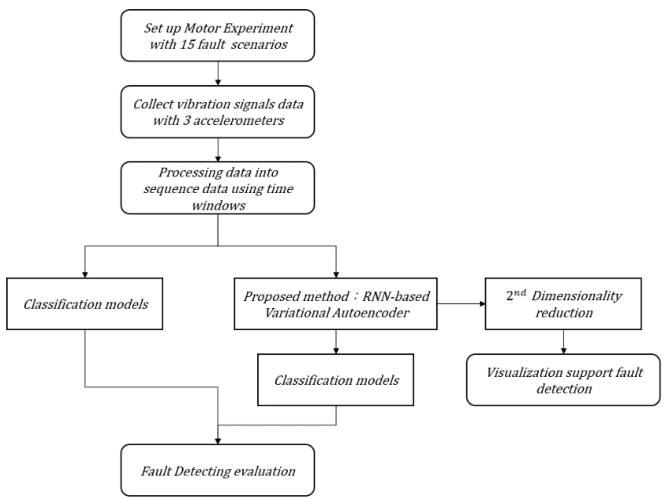


--------------------------------------------------------------------------------

Image 2/48
  ID: page_1_img_1
  Page: 1
  Bounding Box: [298.0, 64.0, 537.0, 243.0]


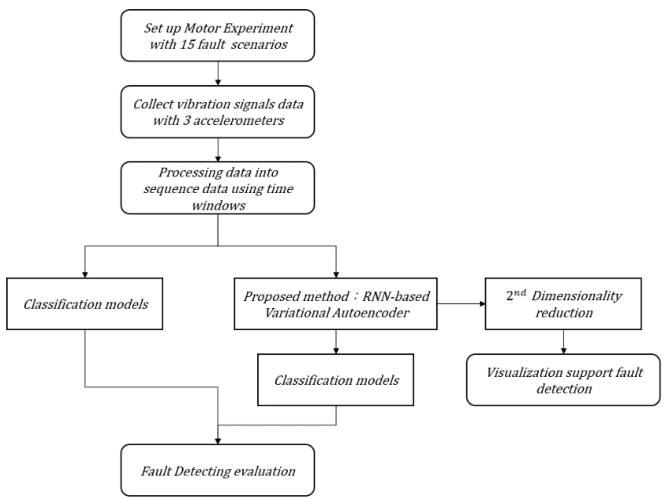


--------------------------------------------------------------------------------

Image 3/48
  ID: page_2_img_2
  Page: 2
  Bounding Box: [43.0, 64.0, 269.0, 193.0]


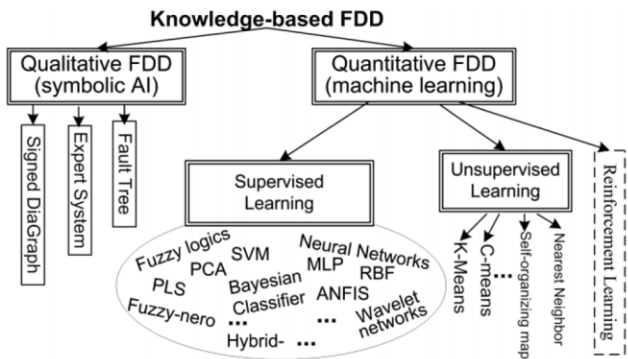


--------------------------------------------------------------------------------

Image 4/48
  ID: page_2_img_3
  Page: 2
  Bounding Box: [43.0, 64.0, 269.0, 193.0]


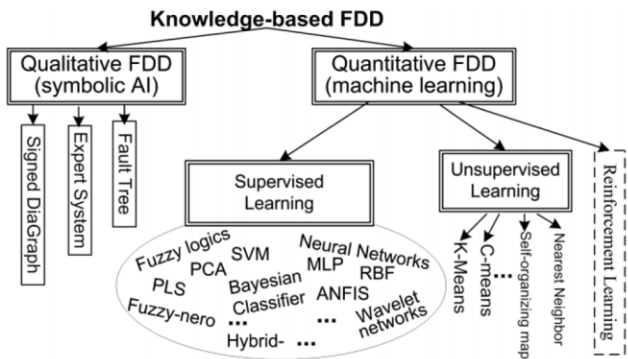


--------------------------------------------------------------------------------

Image 5/48
  ID: page_3_img_4
  Page: 3
  Bounding Box: [55.0, 64.0, 257.0, 131.0]


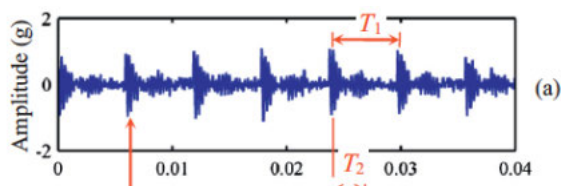


--------------------------------------------------------------------------------

Image 6/48
  ID: page_3_img_5
  Page: 3
  Bounding Box: [55.0, 64.0, 257.0, 131.0]


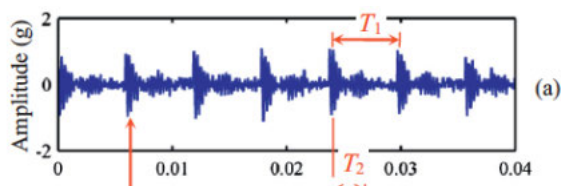


--------------------------------------------------------------------------------

Image 7/48
  ID: page_3_img_6
  Page: 3
  Bounding Box: [55.0, 131.0, 256.0, 208.0]


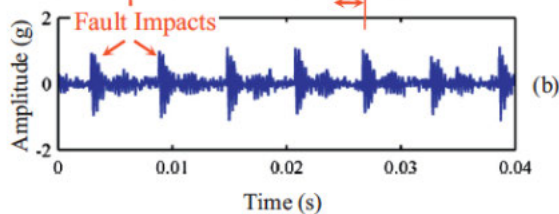


--------------------------------------------------------------------------------

Image 8/48
  ID: page_3_img_7
  Page: 3
  Bounding Box: [55.0, 131.0, 256.0, 208.0]


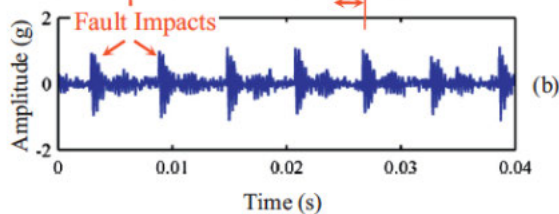


--------------------------------------------------------------------------------

Image 9/48
  ID: page_3_img_8
  Page: 3
  Bounding Box: [52.0, 241.0, 259.0, 383.0]


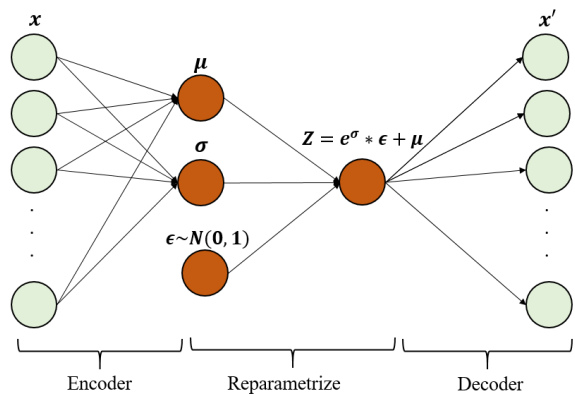


--------------------------------------------------------------------------------

Image 10/48
  ID: page_3_img_9
  Page: 3
  Bounding Box: [52.0, 241.0, 259.0, 383.0]


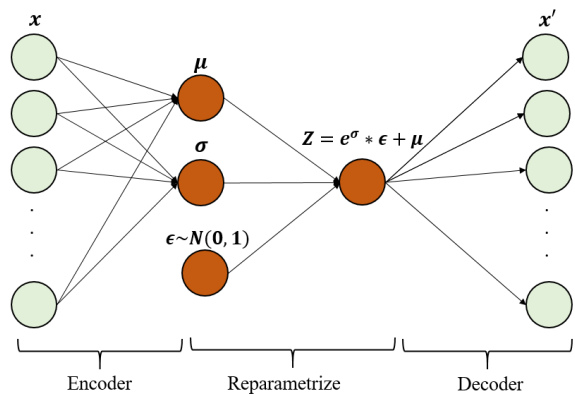


--------------------------------------------------------------------------------

Image 11/48
  ID: page_3_img_10
  Page: 3
  Bounding Box: [300.0, 63.0, 532.0, 175.0]


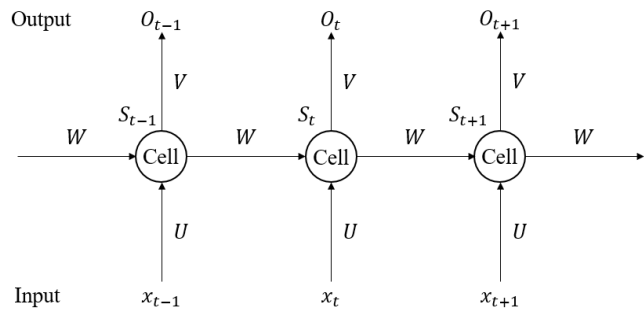


--------------------------------------------------------------------------------

Image 12/48
  ID: page_3_img_11
  Page: 3
  Bounding Box: [300.0, 63.0, 532.0, 175.0]


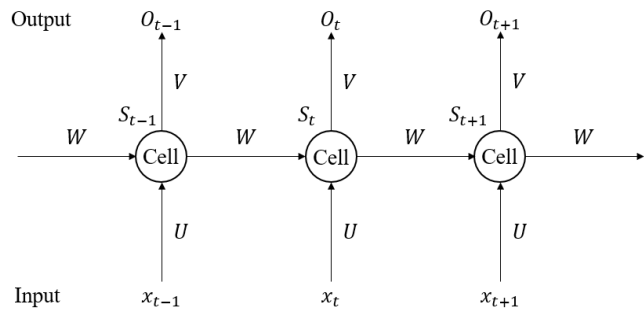


--------------------------------------------------------------------------------

Image 13/48
  ID: page_4_img_12
  Page: 4
  Bounding Box: [56.0, 64.0, 256.0, 197.0]


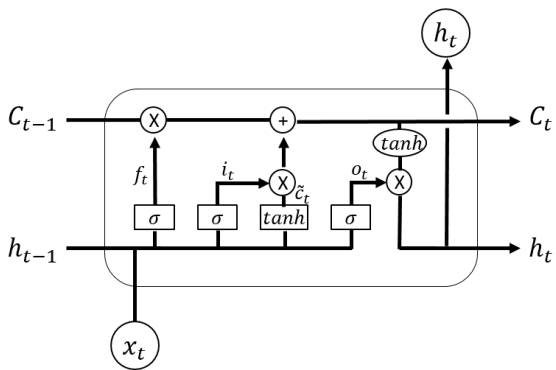


--------------------------------------------------------------------------------

Image 14/48
  ID: page_4_img_13
  Page: 4
  Bounding Box: [56.0, 64.0, 256.0, 197.0]


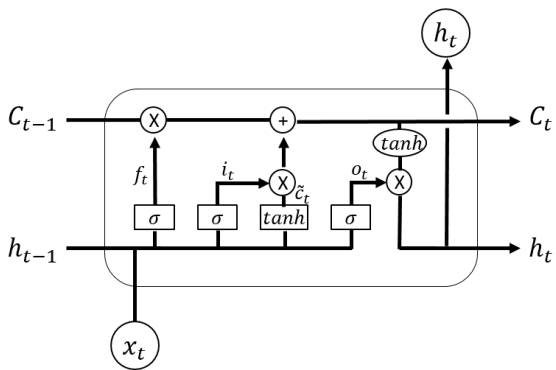


--------------------------------------------------------------------------------

Image 15/48
  ID: page_4_img_14
  Page: 4
  Bounding Box: [336.0, 64.0, 497.0, 186.0]


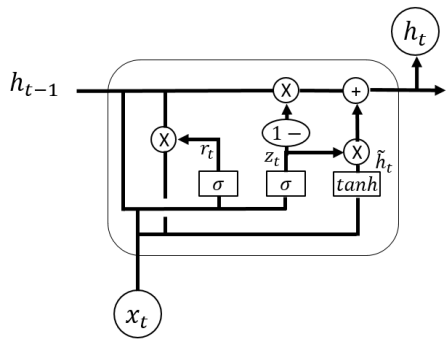


--------------------------------------------------------------------------------

Image 16/48
  ID: page_4_img_15
  Page: 4
  Bounding Box: [336.0, 64.0, 497.0, 186.0]


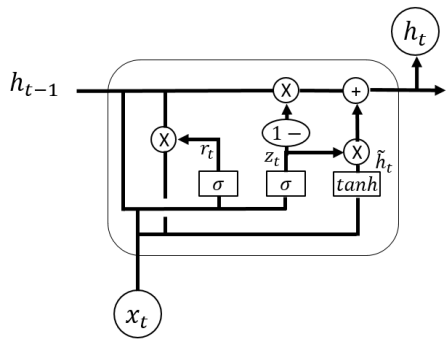


--------------------------------------------------------------------------------

Image 17/48
  ID: page_5_img_16
  Page: 5
  Bounding Box: [77.0, 63.0, 497.0, 283.0]


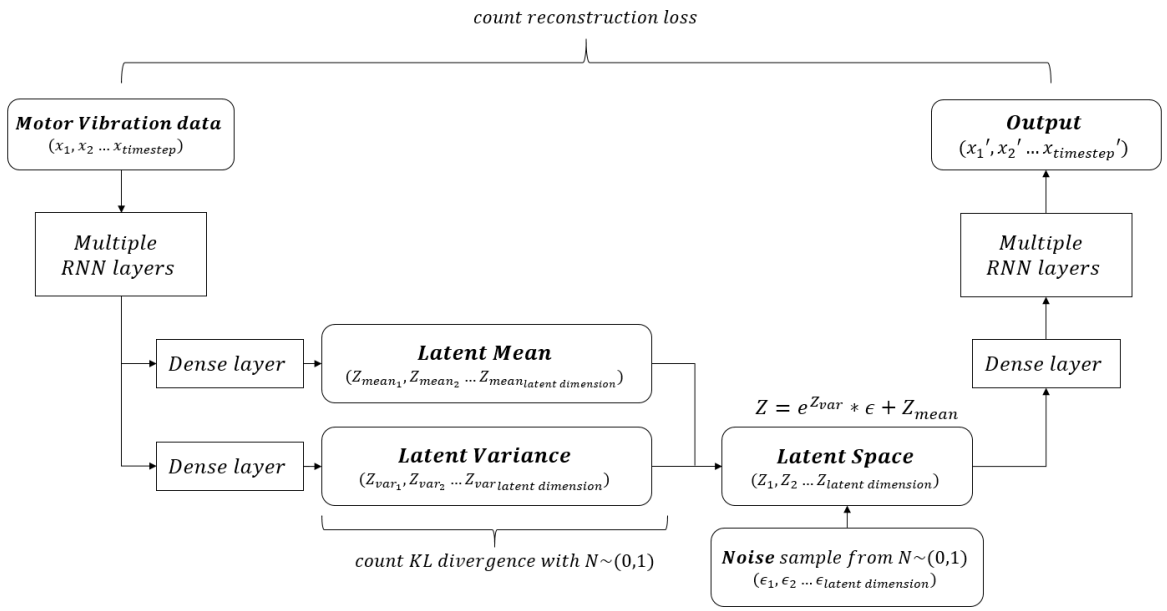


--------------------------------------------------------------------------------

Image 18/48
  ID: page_5_img_17
  Page: 5
  Bounding Box: [77.0, 63.0, 497.0, 283.0]


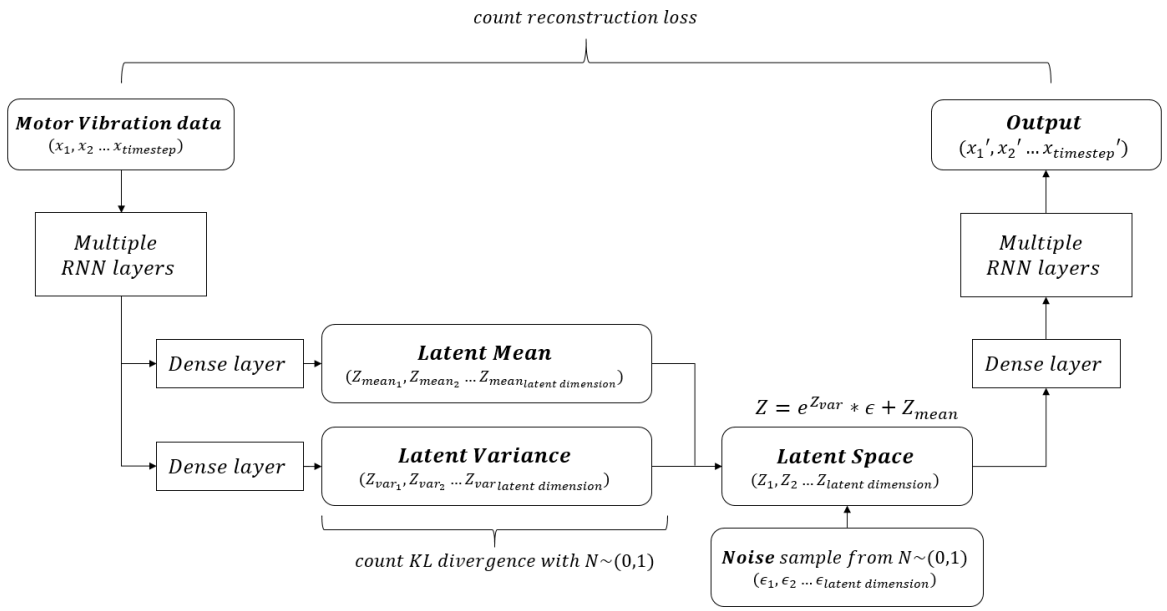


--------------------------------------------------------------------------------

Image 19/48
  ID: page_5_img_18
  Page: 5
  Bounding Box: [300.0, 331.0, 532.0, 486.0]


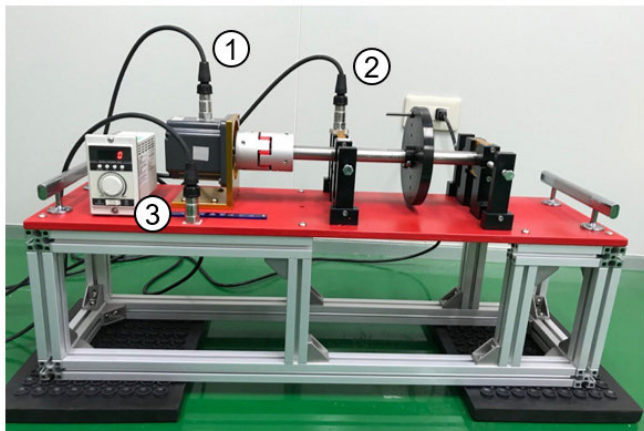


--------------------------------------------------------------------------------

Image 20/48
  ID: page_5_img_19
  Page: 5
  Bounding Box: [300.0, 331.0, 532.0, 486.0]


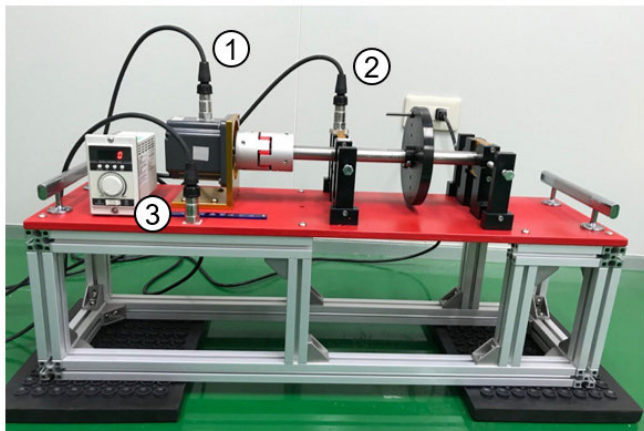


--------------------------------------------------------------------------------

Image 21/48
  ID: page_6_img_20
  Page: 6
  Bounding Box: [69.0, 146.0, 277.0, 289.0]


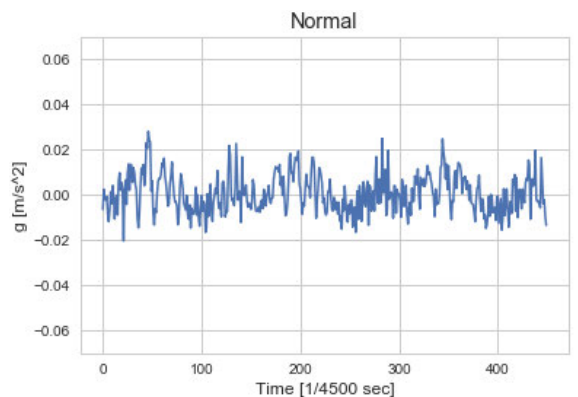


--------------------------------------------------------------------------------

Image 22/48
  ID: page_6_img_21
  Page: 6
  Bounding Box: [69.0, 146.0, 277.0, 289.0]


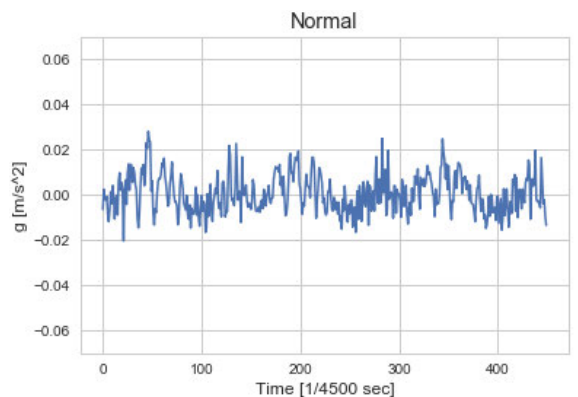


--------------------------------------------------------------------------------

Image 23/48
  ID: page_6_img_22
  Page: 6
  Bounding Box: [296.0, 147.0, 504.0, 290.0]


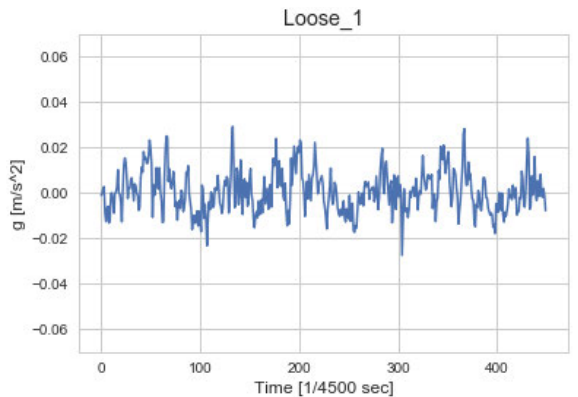


--------------------------------------------------------------------------------

Image 24/48
  ID: page_6_img_23
  Page: 6
  Bounding Box: [296.0, 147.0, 504.0, 290.0]


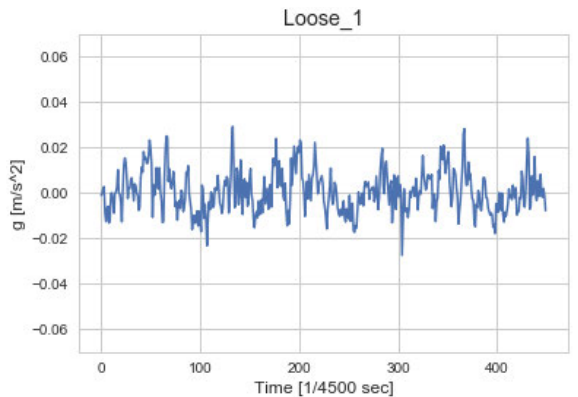


--------------------------------------------------------------------------------

Image 25/48
  ID: page_6_img_24
  Page: 6
  Bounding Box: [71.0, 340.0, 276.0, 484.0]


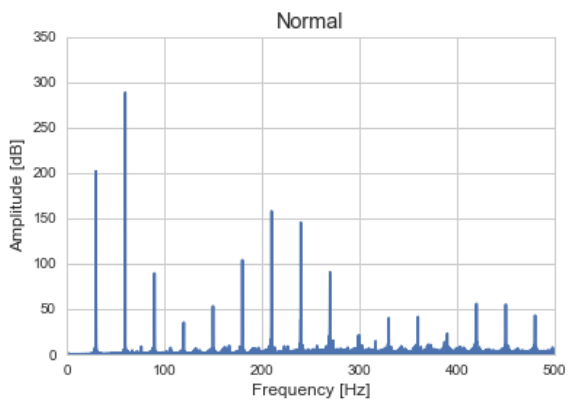


--------------------------------------------------------------------------------

Image 26/48
  ID: page_6_img_25
  Page: 6
  Bounding Box: [71.0, 340.0, 276.0, 484.0]


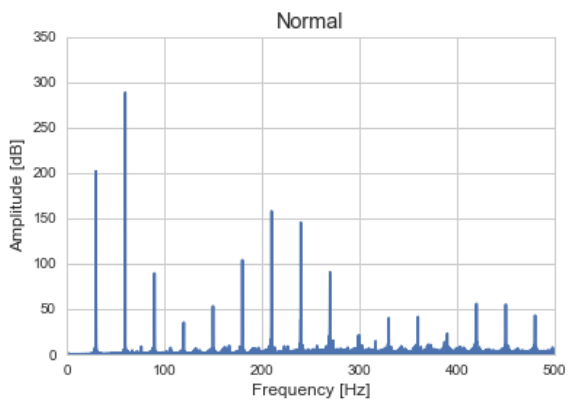


--------------------------------------------------------------------------------

Image 27/48
  ID: page_6_img_26
  Page: 6
  Bounding Box: [297.0, 340.0, 501.0, 484.0]


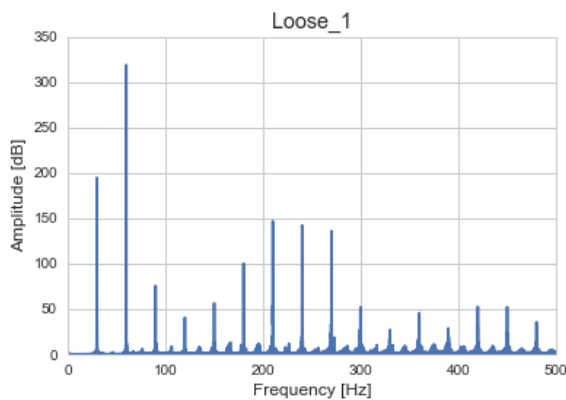


--------------------------------------------------------------------------------

Image 28/48
  ID: page_6_img_27
  Page: 6
  Bounding Box: [297.0, 340.0, 501.0, 484.0]


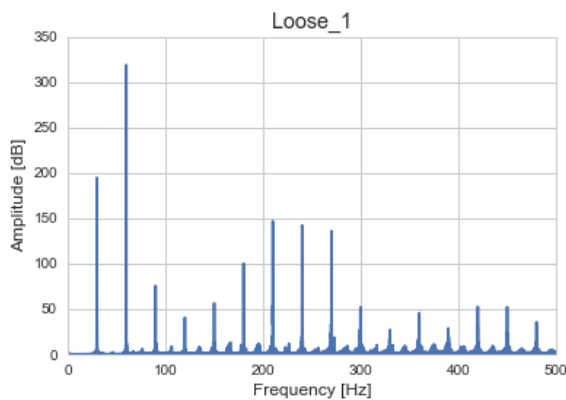


--------------------------------------------------------------------------------

Image 29/48
  ID: page_7_img_28
  Page: 7
  Bounding Box: [37.0, 64.0, 275.0, 131.0]


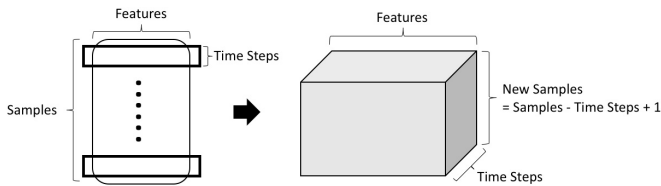


--------------------------------------------------------------------------------

Image 30/48
  ID: page_7_img_29
  Page: 7
  Bounding Box: [37.0, 64.0, 275.0, 131.0]


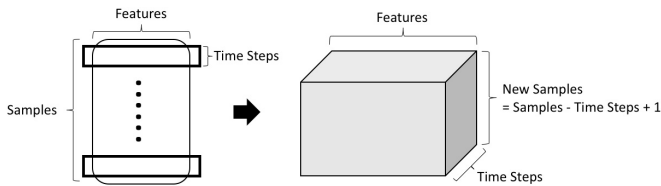


--------------------------------------------------------------------------------

Image 31/48
  ID: page_8_img_30
  Page: 8
  Bounding Box: [47.0, 151.0, 201.0, 335.0]


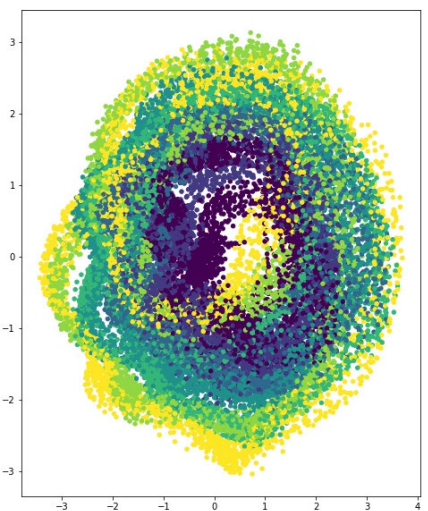


--------------------------------------------------------------------------------

Image 32/48
  ID: page_8_img_31
  Page: 8
  Bounding Box: [47.0, 151.0, 201.0, 335.0]


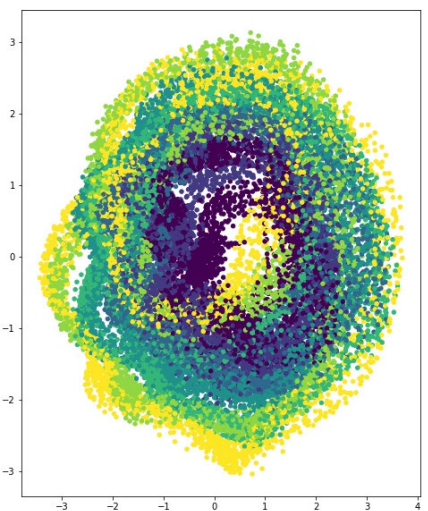


--------------------------------------------------------------------------------

Image 33/48
  ID: page_8_img_32
  Page: 8
  Bounding Box: [214.0, 151.0, 368.0, 335.0]


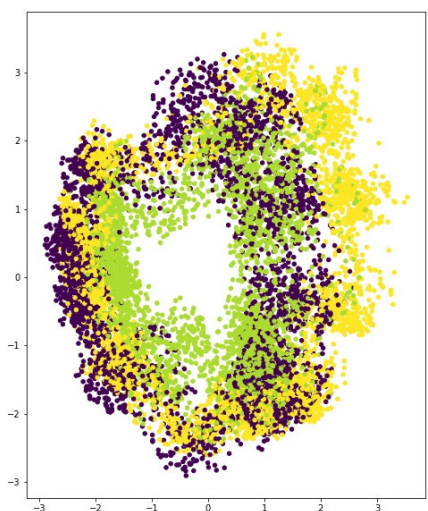


--------------------------------------------------------------------------------

Image 34/48
  ID: page_8_img_33
  Page: 8
  Bounding Box: [214.0, 151.0, 368.0, 335.0]


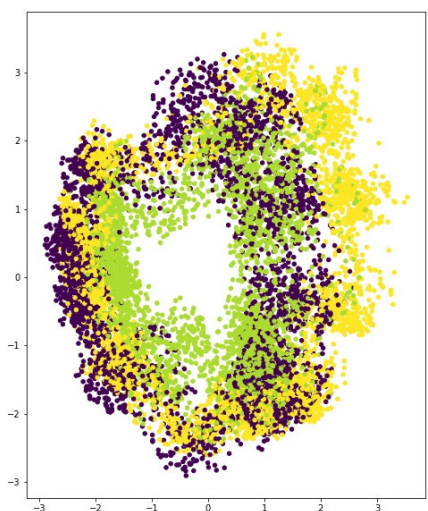


--------------------------------------------------------------------------------

Image 35/48
  ID: page_8_img_34
  Page: 8
  Bounding Box: [372.0, 151.0, 527.0, 335.0]


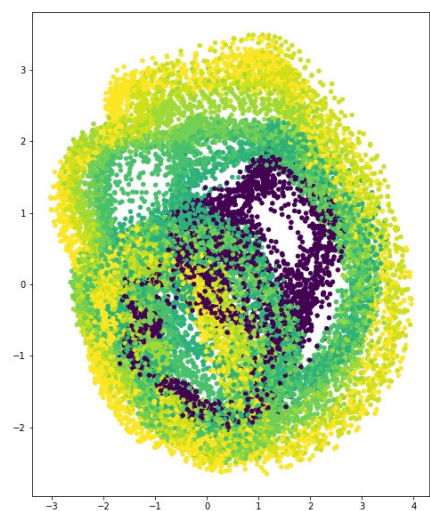


--------------------------------------------------------------------------------

Image 36/48
  ID: page_8_img_35
  Page: 8
  Bounding Box: [372.0, 151.0, 527.0, 335.0]


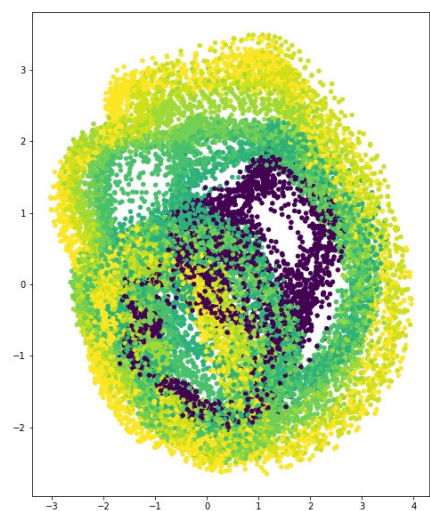


--------------------------------------------------------------------------------

Image 37/48
  ID: page_8_img_36
  Page: 8
  Bounding Box: [52.0, 391.0, 203.0, 567.0]


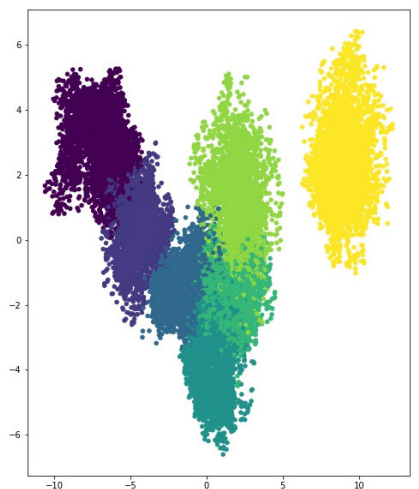


--------------------------------------------------------------------------------

Image 38/48
  ID: page_8_img_37
  Page: 8
  Bounding Box: [52.0, 391.0, 203.0, 567.0]


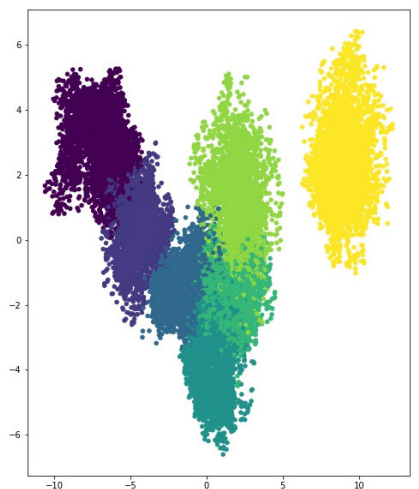


--------------------------------------------------------------------------------

Image 39/48
  ID: page_8_img_38
  Page: 8
  Bounding Box: [210.0, 390.0, 361.0, 568.0]


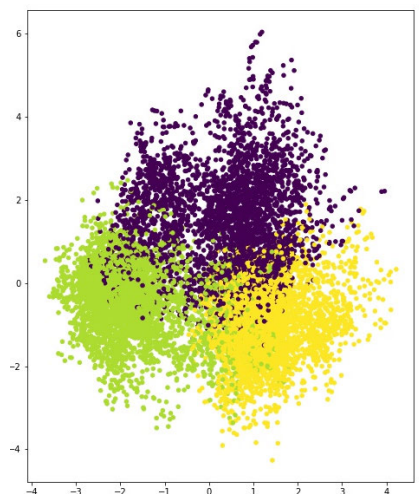


--------------------------------------------------------------------------------

Image 40/48
  ID: page_8_img_39
  Page: 8
  Bounding Box: [210.0, 390.0, 361.0, 568.0]


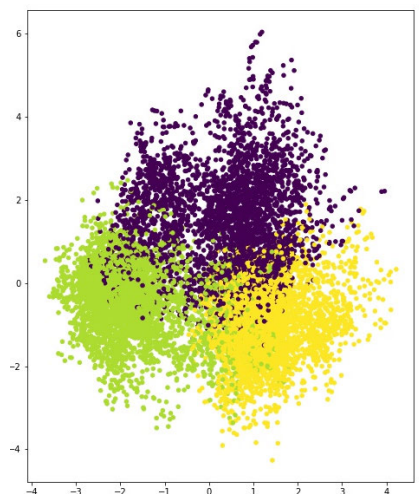


--------------------------------------------------------------------------------

Image 41/48
  ID: page_8_img_40
  Page: 8
  Bounding Box: [369.0, 391.0, 520.0, 569.0]


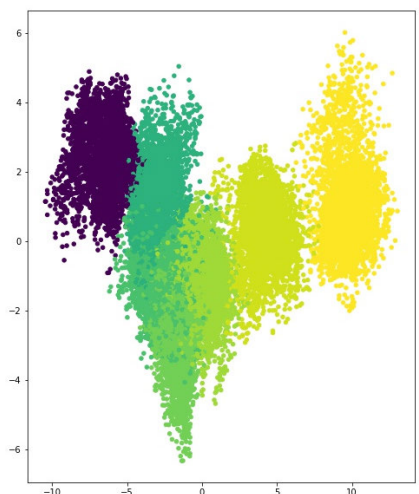


--------------------------------------------------------------------------------

Image 42/48
  ID: page_8_img_41
  Page: 8
  Bounding Box: [369.0, 391.0, 520.0, 569.0]


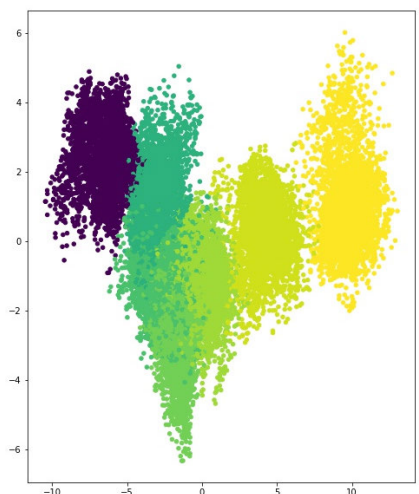


--------------------------------------------------------------------------------

Image 43/48
  ID: page_10_img_42
  Page: 10
  Bounding Box: [296.0, 65.0, 369.0, 157.0]


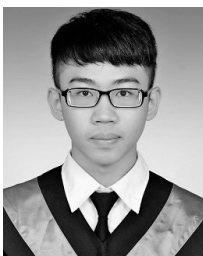


--------------------------------------------------------------------------------

Image 44/48
  ID: page_10_img_43
  Page: 10
  Bounding Box: [296.0, 65.0, 369.0, 157.0]


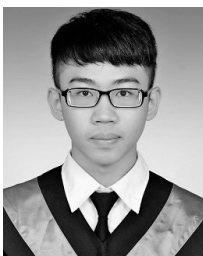


--------------------------------------------------------------------------------

Image 45/48
  ID: page_10_img_44
  Page: 10
  Bounding Box: [296.0, 236.0, 369.0, 326.0]


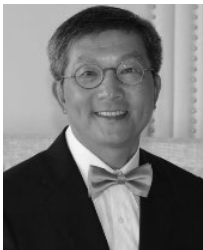


--------------------------------------------------------------------------------

Image 46/48
  ID: page_10_img_45
  Page: 10
  Bounding Box: [296.0, 236.0, 369.0, 326.0]


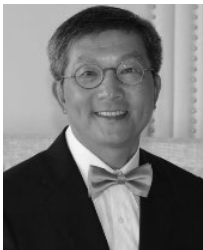


--------------------------------------------------------------------------------

Image 47/48
  ID: page_10_img_46
  Page: 10
  Bounding Box: [296.0, 581.0, 369.0, 673.0]


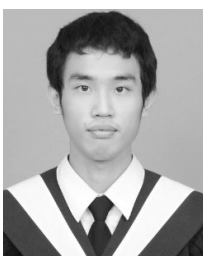


--------------------------------------------------------------------------------

Image 48/48
  ID: page_10_img_47
  Page: 10
  Bounding Box: [296.0, 581.0, 369.0, 673.0]


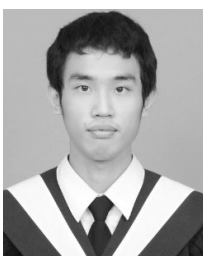


--------------------------------------------------------------------------------


In [10]:
if accurate_result and accurate_result['images']:
    print(f"\n🖼️ Displaying {len(accurate_result['images'])} extracted images:\n")
    
    for idx, img_data in enumerate(accurate_result['images']):
        print(f"\nImage {idx + 1}/{len(accurate_result['images'])}")
        print(f"  ID: {img_data['image_id']}")
        print(f"  Page: {img_data['page']}")
        if img_data.get('bbox'):
            print(f"  Bounding Box: {img_data['bbox']}")
        
        # Decode and display image
        img_bytes = base64.b64decode(img_data['image_base64'])
        display(Image(data=img_bytes))
        print("\n" + "-" * 80)
else:
    print("\n📭 No images extracted")

### 4.4 Display Extracted Tables

In [11]:
if accurate_result and accurate_result['tables']:
    print(f"\n📊 Displaying {len(accurate_result['tables'])} extracted tables:\n")
    
    for idx, table_data in enumerate(accurate_result['tables']):
        print(f"\nTable {idx + 1}/{len(accurate_result['tables'])}")
        print(f"  ID: {table_data['table_id']}")
        print(f"  Page: {table_data['page']}")
        if table_data.get('bbox'):
            print(f"  Bounding Box: {table_data['bbox']}")
        
        print("\nTable Content:")
        display(Markdown(table_data['markdown']))
        print("\n" + "-" * 80)
else:
    print("\n📭 No tables extracted (tables may be embedded in markdown)")


📊 Displaying 6 extracted tables:


Table 1/6
  ID: page_6_table_0
  Page: 6
  Bounding Box: [46.0, 84.0, 524.0, 133.0]

Table Content:


<table><tr><td>Rated speed</td><td>Maximum speed</td><td>Machine length</td><td>Rated power</td><td>Input voltage</td><td>Phase</td><td>Rated torque</td><td>Maximum torque</td></tr><tr><td>3000 rpm</td><td>3500 rpm</td><td>80 mm</td><td>200 W</td><td>AC 220</td><td>3</td><td>0.66 N-M</td><td>1.32 N-M</td></tr></table>


--------------------------------------------------------------------------------

Table 2/6
  ID: page_7_table_1
  Page: 7
  Bounding Box: [35.0, 185.0, 275.0, 206.0]

Table Content:


<table><tr><td></td><td>RNN</td><td>LSTM</td><td>GRU</td></tr><tr><td>Loss</td><td>1.384</td><td>0.325</td><td>0.215</td></tr></table>


--------------------------------------------------------------------------------

Table 3/6
  ID: page_7_table_2
  Page: 7
  Bounding Box: [35.0, 243.0, 275.0, 263.0]

Table Content:


<table><tr><td></td><td>16</td><td>32</td><td>34</td><td>128</td><td>256</td></tr><tr><td>Loss</td><td>0.51</td><td>0.49</td><td>0.24</td><td>0.038</td><td>0.0044</td></tr></table>


--------------------------------------------------------------------------------

Table 4/6
  ID: page_7_table_3
  Page: 7
  Bounding Box: [296.0, 84.0, 536.0, 105.0]

Table Content:


<table><tr><td></td><td>64</td><td>128</td><td>256</td><td>512</td></tr><tr><td>Loss</td><td>0.144</td><td>0.159</td><td>0.038</td><td>0.187</td></tr></table>


--------------------------------------------------------------------------------

Table 5/6
  ID: page_7_table_4
  Page: 7
  Bounding Box: [296.0, 147.0, 536.0, 171.0]

Table Content:


<table><tr><td></td><td>3</td><td>5</td><td>10</td><td>25</td><td>50</td><td>75</td><td>100</td></tr><tr><td>Loss</td><td>0.482</td><td>0.121</td><td>0.067</td><td>0.0453</td><td>0.083</td><td>0.038</td><td>0.072</td></tr><tr><td>Accuracy</td><td>0.495</td><td>0.862</td><td>0.956</td><td>0.984</td><td>0.994</td><td>0.997</td><td>0.992</td></tr></table>


--------------------------------------------------------------------------------

Table 6/6
  ID: page_8_table_5
  Page: 8
  Bounding Box: [50.0, 84.0, 521.0, 139.0]

Table Content:


<table><tr><td></td><td>SVM</td><td>Random Forest</td><td>XGBoost</td><td>Neural Network</td><td>RNN</td><td>LSTM</td><td>GRU</td></tr><tr><td>None (original data)</td><td>0.565</td><td>0.555</td><td>0.940</td><td>0.850</td><td>0.601</td><td>0.833</td><td>0.948</td></tr><tr><td>Autoencoder</td><td>0.461</td><td>0.554</td><td>0.914</td><td>0.821</td><td></td><td></td><td></td></tr><tr><td>Variational Autoencoder</td><td>0.504</td><td>0.597</td><td>0.932</td><td>0.848</td><td></td><td></td><td></td></tr><tr><td>RNN-based VAE (ours)</td><td>0.792</td><td>0.889</td><td>0.966</td><td>0.998</td><td></td><td></td><td></td></tr></table>


--------------------------------------------------------------------------------


### 4.5 Display Extracted Formulas

In [12]:
if accurate_result and accurate_result['formulas']:
    print(f"\n🧮 Displaying {len(accurate_result['formulas'])} extracted formulas:\n")
    
    for idx, formula_data in enumerate(accurate_result['formulas']):
        print(f"\nFormula {idx + 1}/{len(accurate_result['formulas'])}")
        print(f"  ID: {formula_data['formula_id']}")
        print(f"  Page: {formula_data['page']}")
        if formula_data.get('bbox'):
            print(f"  Bounding Box: {formula_data['bbox']}")
        
        print("\nLaTeX:")
        display(Markdown(f"$${formula_data['latex']}$$"))
        print("\n" + "-" * 80)
else:
    print("\n📭 No formulas extracted (formulas may be embedded in markdown)")


🧮 Displaying 20 extracted formulas:


Formula 1/20
  ID: page_3_formula_0
  Page: 3
  Bounding Box: [361.0, 240.0, 539.0, 265.0]

LaTeX:


$$P (X) = \int P (X | z) P (z) d z \tag {1}$$


--------------------------------------------------------------------------------

Formula 2/20
  ID: page_3_formula_1
  Page: 3
  Bounding Box: [328.0, 322.0, 538.0, 335.0]

LaTeX:


$$\operatorname m a x i m i z e E _ {q _ {\phi} (z \mid x)} - K L \left(q _ {\phi} (z \mid x) \mid \mid P _ {\theta} (z)\right) \tag {2}$$


--------------------------------------------------------------------------------

Formula 3/20
  ID: page_3_formula_2
  Page: 3
  Bounding Box: [364.0, 508.0, 537.0, 520.0]

LaTeX:


$$\mathrm {S} _ {\mathrm {t}} = f \left(U * x _ {t} + \mathrm {W} * \mathrm {S} _ {\mathrm {t} - 1}\right) \tag {3}$$


--------------------------------------------------------------------------------

Formula 4/20
  ID: page_3_formula_3
  Page: 3
  Bounding Box: [366.0, 523.0, 538.0, 535.0]

LaTeX:


$$\mathrm {o} _ {\mathrm {t}} = f \left(s _ {t} * V\right) \tag {4}$$


--------------------------------------------------------------------------------

Formula 5/20
  ID: page_4_formula_4
  Page: 4
  Bounding Box: [71.0, 343.0, 277.0, 355.0]

LaTeX:


$$f _ {t} = \sigma \left(W _ {f} x _ {t} + U _ {f} h _ {t - 1} + b _ {f} + f o r g e t b i a s\right) \tag {5}$$


--------------------------------------------------------------------------------

Formula 6/20
  ID: page_4_formula_5
  Page: 4
  Bounding Box: [72.0, 358.0, 277.0, 369.0]

LaTeX:


$$i _ {t} = \sigma \left(W _ {i} x _ {t} + U _ {i} h _ {t - 1} + b _ {i}\right) \tag {6}$$


--------------------------------------------------------------------------------

Formula 7/20
  ID: page_4_formula_6
  Page: 4
  Bounding Box: [71.0, 372.0, 277.0, 384.0]

LaTeX:


$$\tilde {C} _ {t} = \t a n h \left(W _ {c} x _ {t} + U _ {c} h _ {t - 1} + b _ {c}\right) \tag {7}$$


--------------------------------------------------------------------------------

Formula 8/20
  ID: page_4_formula_7
  Page: 4
  Bounding Box: [69.0, 387.0, 277.0, 399.0]

LaTeX:


$$C _ {t} = i _ {t} * \tilde {C} _ {t} + f _ {t} * C _ {t - 1} \tag {8}$$


--------------------------------------------------------------------------------

Formula 9/20
  ID: page_4_formula_8
  Page: 4
  Bounding Box: [71.0, 403.0, 277.0, 414.0]

LaTeX:


$$o _ {t} = \sigma \left(W _ {o} x _ {t} + U _ {o} h _ {t - 1} + b _ {o}\right) \tag {9}$$


--------------------------------------------------------------------------------

Formula 10/20
  ID: page_4_formula_9
  Page: 4
  Bounding Box: [71.0, 418.0, 277.0, 429.0]

LaTeX:


$$h _ {t} = o _ {t} * \tanh  \left(C _ {t}\right) \tag {10}$$


--------------------------------------------------------------------------------

Formula 11/20
  ID: page_4_formula_10
  Page: 4
  Bounding Box: [69.0, 651.0, 277.0, 662.0]

LaTeX:


$$z _ {t} = \sigma \left(W _ {z} x _ {t} + U _ {z} h _ {t - 1} + b _ {z}\right) \tag {11}$$


--------------------------------------------------------------------------------

Formula 12/20
  ID: page_4_formula_11
  Page: 4
  Bounding Box: [69.0, 670.0, 277.0, 682.0]

LaTeX:


$$r _ {t} = \sigma \left(W _ {r} x _ {t} + U _ {r} h _ {t - 1} + b _ {r}\right) \tag {12}$$


--------------------------------------------------------------------------------

Formula 13/20
  ID: page_4_formula_12
  Page: 4
  Bounding Box: [69.0, 691.0, 277.0, 721.0]

LaTeX:


$$\begin{array}{l} h _ {t} = z _ {t} * h _ {t - 1} + \left(1 - z _ {t}\right) \\ * \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. \left. h _ {t} \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \right. \\ \end{array}$$


--------------------------------------------------------------------------------

Formula 14/20
  ID: page_4_formula_13
  Page: 4
  Bounding Box: [294.0, 559.0, 538.0, 598.0]

LaTeX:


$$C r o s s e n t r o p y = \frac {- \sum_ {n = 1} ^ {N} [ y * l n a + (1 - y) * l n (1 - a) ]}{N} \tag {14}$$


--------------------------------------------------------------------------------

Formula 15/20
  ID: page_4_formula_14
  Page: 4
  Bounding Box: [343.0, 664.0, 538.0, 692.0]

LaTeX:


$$_ {K L} (P \| Q) = - \sum_ {i} P (i) * \ln \frac {Q (i)}{P (i)} \tag {15}$$


--------------------------------------------------------------------------------

Formula 16/20
  ID: page_5_formula_15
  Page: 5
  Bounding Box: [105.0, 406.0, 277.0, 419.0]

LaTeX:


$$\mathrm {m} _ {\mathrm {t}} = \beta_ {1} \mathrm {m} _ {\mathrm {t} - 1} + (1 - \beta_ {1}) \mathrm {g} _ {\mathrm {t}} \tag {16}$$


--------------------------------------------------------------------------------

Formula 17/20
  ID: page_5_formula_16
  Page: 5
  Bounding Box: [108.0, 420.0, 277.0, 434.0]

LaTeX:


$$v _ {t} = \beta_ {2} v _ {t - 1} + \left(1 - \beta_ {2}\right) g _ {t} ^ {2} \tag {17}$$


--------------------------------------------------------------------------------

Formula 18/20
  ID: page_5_formula_17
  Page: 5
  Bounding Box: [105.0, 434.0, 277.0, 459.0]

LaTeX:


$$\widehat {m} _ {t} \leftarrow \frac {\mathrm {m} _ {\mathrm {t}}}{1 - \beta_ {1} ^ {t}} \tag {18}$$


--------------------------------------------------------------------------------

Formula 19/20
  ID: page_5_formula_18
  Page: 5
  Bounding Box: [108.0, 459.0, 277.0, 484.0]

LaTeX:


$$\widehat {v} _ {t} \leftarrow \frac {v _ {t}}{1 - \beta_ {2} ^ {t}} \tag {19}$$


--------------------------------------------------------------------------------

Formula 20/20
  ID: page_5_formula_19
  Page: 5
  Bounding Box: [100.0, 484.0, 277.0, 508.0]

LaTeX:


$$\theta_ t + 1 \leftarrow \theta_ {t} - \left(\frac {\eta}{\sqrt {\hat {v} _ {t} + \varepsilon}}\right) \hat {m} _ {t} \tag {20}$$


--------------------------------------------------------------------------------


## 5. Comparison: Fast vs Accurate Parser


⚖️ Parser Comparison:



Metric  Fast Parser Accurate Parser
0                Parser  pymupdf4llm          mineru
1  Processing Time (ms)         8384          709112
2                 Pages           11              11
3       Markdown Length        49865           51695
4      Images Extracted          N/A              48
5      Tables Extracted          N/A               6
6    Formulas Extracted          N/A              20

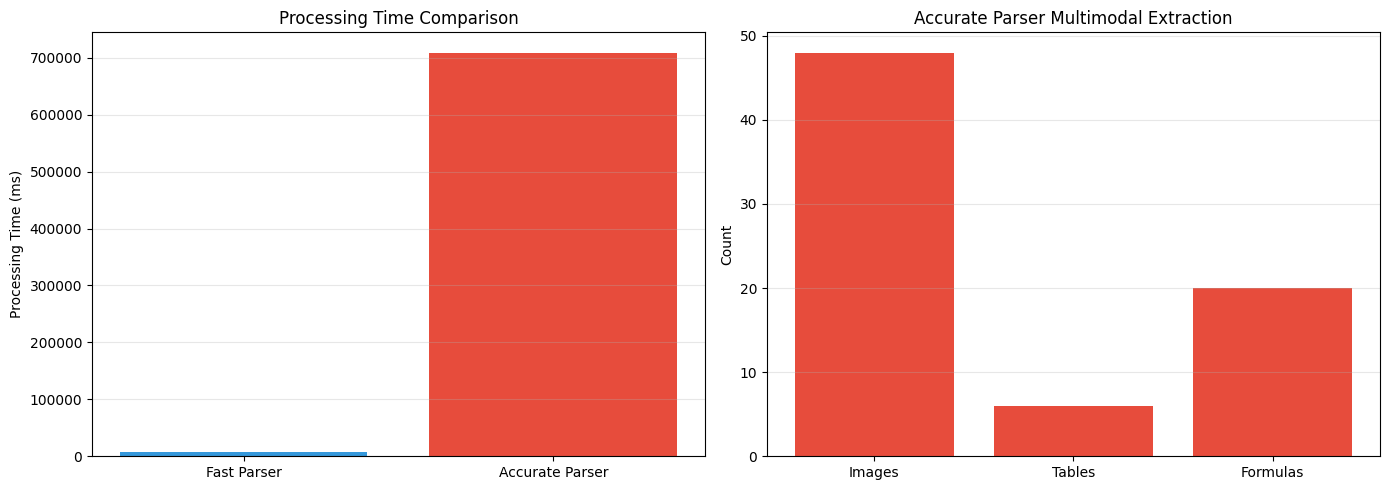


✅ Comparison complete!


In [13]:
if fast_result and accurate_result:
    print("\n⚖️ Parser Comparison:\n")
    
    comparison_data = {
        'Metric': [
            'Parser',
            'Processing Time (ms)',
            'Pages',
            'Markdown Length',
            'Images Extracted',
            'Tables Extracted',
            'Formulas Extracted'
        ],
        'Fast Parser': [
            fast_result['metadata']['parser'],
            fast_result['metadata']['processing_time_ms'],
            fast_result['metadata']['pages'],
            len(fast_result['markdown']),
            'N/A',
            'N/A',
            'N/A'
        ],
        'Accurate Parser': [
            accurate_result['metadata']['parser'],
            accurate_result['metadata']['processing_time_ms'],
            accurate_result['metadata']['pages'],
            len(accurate_result['markdown']),
            len(accurate_result['images']),
            len(accurate_result['tables']),
            len(accurate_result['formulas'])
        ]
    }
    
    df_comparison = pd.DataFrame(comparison_data)
    display(df_comparison)
    
    # Visualization: Processing time comparison
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Processing time
    parsers = ['Fast Parser', 'Accurate Parser']
    times = [
        fast_result['metadata']['processing_time_ms'],
        accurate_result['metadata']['processing_time_ms']
    ]
    ax1.bar(parsers, times, color=['#3498db', '#e74c3c'])
    ax1.set_ylabel('Processing Time (ms)')
    ax1.set_title('Processing Time Comparison')
    ax1.grid(axis='y', alpha=0.3)
    
    # Content extraction
    categories = ['Images', 'Tables', 'Formulas']
    accurate_counts = [
        len(accurate_result['images']),
        len(accurate_result['tables']),
        len(accurate_result['formulas'])
    ]
    ax2.bar(categories, accurate_counts, color='#e74c3c')
    ax2.set_ylabel('Count')
    ax2.set_title('Accurate Parser Multimodal Extraction')
    ax2.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\n✅ Comparison complete!")
elif fast_result:
    print("\n⚠️ Only fast parser results available")
elif accurate_result:
    print("\n⚠️ Only accurate parser results available")
else:
    print("\n❌ No parsing results available for comparison")

## 6. Export Results
Save parsing results to JSON files

In [14]:
import json
from pathlib import Path

# Create output directory
output_dir = Path('parser_results')
output_dir.mkdir(exist_ok=True)

# Save fast parser results
if fast_result:
    fast_output = output_dir / 'fast_parser_result.json'
    with open(fast_output, 'w', encoding='utf-8') as f:
        json.dump(fast_result, f, indent=2, ensure_ascii=False)
    print(f"✅ Fast parser results saved to: {fast_output}")

# Save accurate parser results
if accurate_result:
    accurate_output = output_dir / 'accurate_parser_result.json'
    with open(accurate_output, 'w', encoding='utf-8') as f:
        json.dump(accurate_result, f, indent=2, ensure_ascii=False)
    print(f"✅ Accurate parser results saved to: {accurate_output}")

# Save markdown outputs
if fast_result:
    fast_md = output_dir / 'fast_parser_output.md'
    fast_md.write_text(fast_result['markdown'], encoding='utf-8')
    print(f"✅ Fast parser markdown saved to: {fast_md}")

if accurate_result:
    accurate_md = output_dir / 'accurate_parser_output.md'
    accurate_md.write_text(accurate_result['markdown'], encoding='utf-8')
    print(f"✅ Accurate parser markdown saved to: {accurate_md}")

print(f"\n📁 All results saved to: {output_dir.absolute()}")

✅ Fast parser results saved to: parser_results/fast_parser_result.json
✅ Accurate parser results saved to: parser_results/accurate_parser_result.json
✅ Fast parser markdown saved to: parser_results/fast_parser_output.md
✅ Accurate parser markdown saved to: parser_results/accurate_parser_output.md

📁 All results saved to: /home/ubuntu/Desktop/two_tier_document_parser/examples/notebooks/parser_results


## Summary

This notebook demonstrated:
- ✅ Health checks for both parser services
- ✅ Fast parser (PyMuPDF4LLM) for ultra-fast text extraction
- ✅ Accurate parser (MinerU) for high-quality multimodal extraction
- ✅ Visualization of markdown, images, tables, and formulas
- ✅ Performance comparison between parsers
- ✅ Export results to JSON and markdown files

### Key Takeaways:
- **Fast Parser**: Best for quick text extraction, ~100-500ms per document
- **Accurate Parser**: Best for documents with images/tables/formulas, ~1-3 minutes per document

### License
Both parsers are licensed under AGPL-3.0. Source code: https://github.com/daddal001/two_tier_document_parser